In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from folium.plugins import MarkerCluster

df = pd.read_csv("/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/CBS_2021-2023_Full.csv")
print(df.columns)

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/2008765550.py:11: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/CBS_2021-2023_Full.csv")


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [248]:
# "started_at" ve "ended_at" sütunlarını datetime formatına çevir
df["started_at"] = pd.to_datetime(df["started_at"], errors="coerce")
df["ended_at"] = pd.to_datetime(df["ended_at"], errors="coerce")

# Kullanım süresini hesapla (dakika cinsinden)
df["ride_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60

In [249]:
# Orijinal veriyi bir kopyada sakla (eğer geri dönmek gerekirse)
df_original = df.copy()

# Hafızayı optimize etmek için gereksiz sütunları kaldır
columns_to_drop = ["start_station_id", "end_station_id"]

df = df.drop(columns=columns_to_drop, errors="ignore")

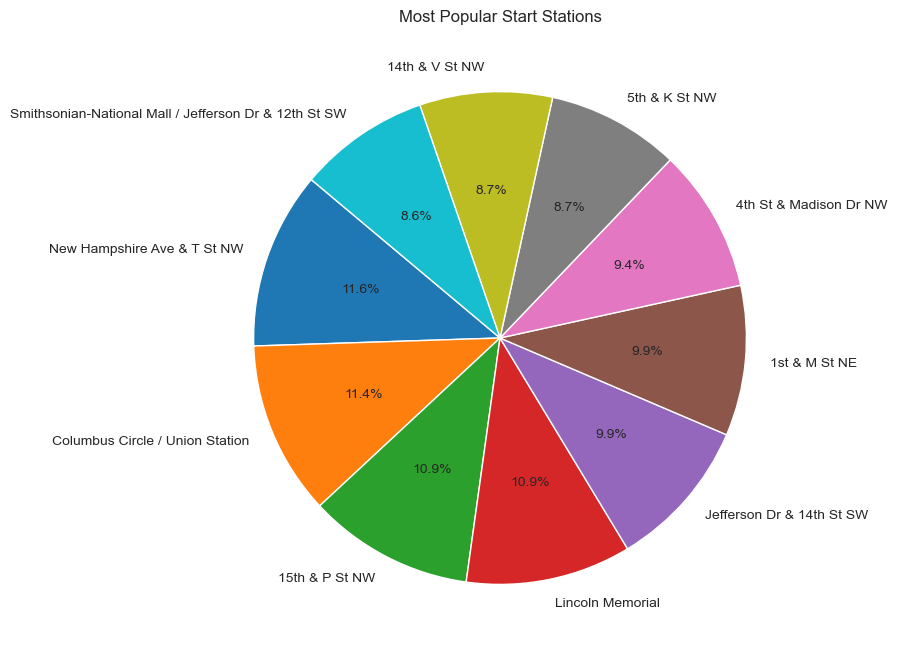

In [250]:
# En çok kullanılan başlangıç istasyonlarını bul
top_start_stations = df["start_station_name"].value_counts().head(10)

# Pie chart oluştur
plt.figure(figsize=(8, 8))
plt.pie(top_start_stations, labels=top_start_stations.index, autopct="%1.1f%%", startangle=140)
plt.title("Most Popular Start Stations")
plt.show()


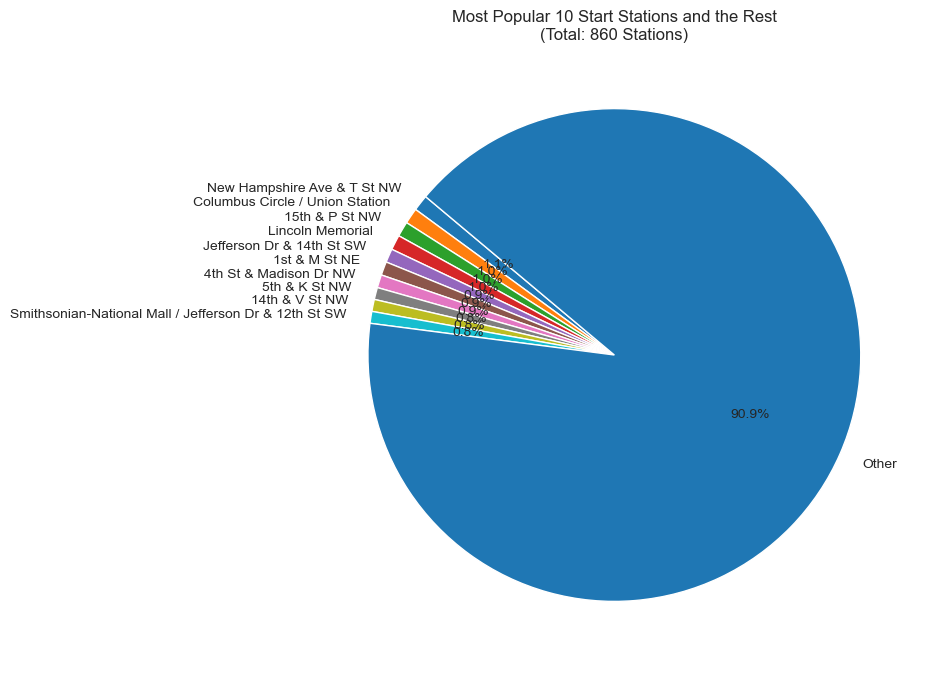

In [251]:
# En çok kullanılan 5 başlangıç istasyonunu bul
top_stations = df["start_station_name"].value_counts()
top_n = 10  # En çok kullanılan istasyon sayısı

# İlk 5 istasyonu al ve geri kalanları "Diğer" olarak grupla
top_n_stations = top_stations.head(top_n)
other_stations = top_stations.iloc[top_n:].sum()

# Yeni veri oluştur
station_labels = list(top_n_stations.index) + ["Other"]
station_values = list(top_n_stations.values) + [other_stations]

# Pie chart oluştur
plt.figure(figsize=(8, 8))
plt.pie(station_values, labels=station_labels, autopct="%1.1f%%", startangle=140)
plt.title(f"Most Popular {top_n} Start Stations and the Rest\n(Total: {len(top_stations)} Stations)")
plt.show()


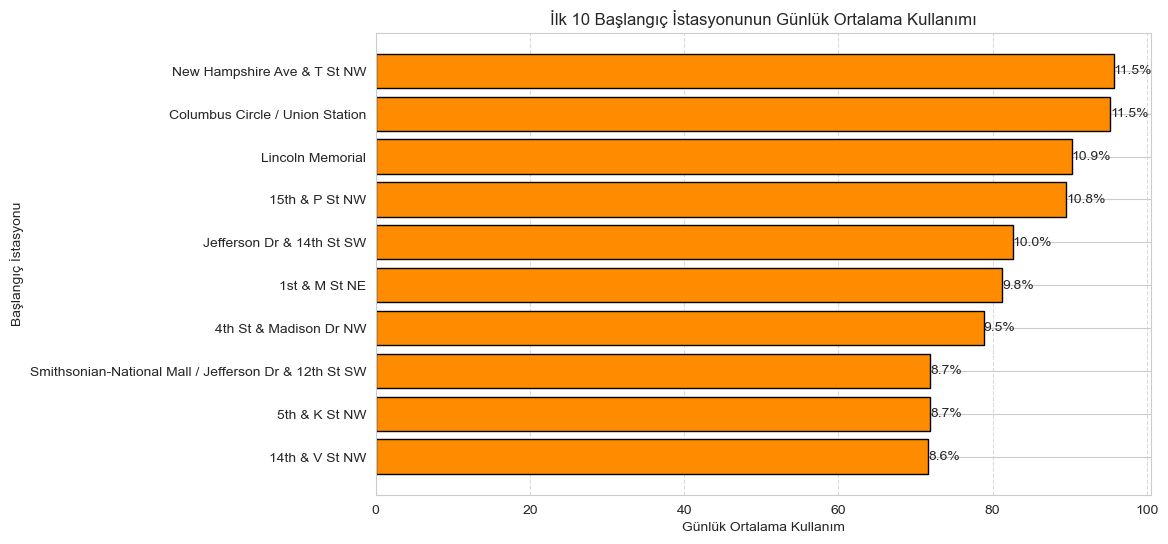

In [252]:
# Günlük Ortalama Kullanım Grafiği (Yüzdelik Oranlarla)

# Günlük bazda veriyi gruplama
df["date"] = df["started_at"].dt.date
daily_counts = df.groupby(["date", "start_station_name"]).size().reset_index(name="ride_count")

# En popüler 10 istasyonun günlük ortalamalarını hesapla
top_10_stations = df["start_station_name"].value_counts().head(10).index
daily_avg = daily_counts[daily_counts["start_station_name"].isin(top_10_stations)]

# Günlük ortalama kullanım hesapla
station_daily_avg = daily_avg.groupby("start_station_name")["ride_count"].mean().sort_values()

# Toplam günlük ortalama kullanımın yüzdesini hesapla
total_daily_avg = station_daily_avg.sum()
station_daily_avg_percent = (station_daily_avg / total_daily_avg) * 100

# 2. Grafik: Bar Chart (Günlük Ortalama Kullanım + Yüzdelik Oranlar)
plt.figure(figsize=(10, 6))
bars = plt.barh(station_daily_avg.index, station_daily_avg, color="darkorange", edgecolor="black")

# Çubukların içine yüzdelik oranları yazalım
for bar, percent in zip(bars, station_daily_avg_percent):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{percent:.1f}%", va='center')

plt.title("İlk 10 Başlangıç İstasyonunun Günlük Ortalama Kullanımı")
plt.xlabel("Günlük Ortalama Kullanım")
plt.ylabel("Başlangıç İstasyonu")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

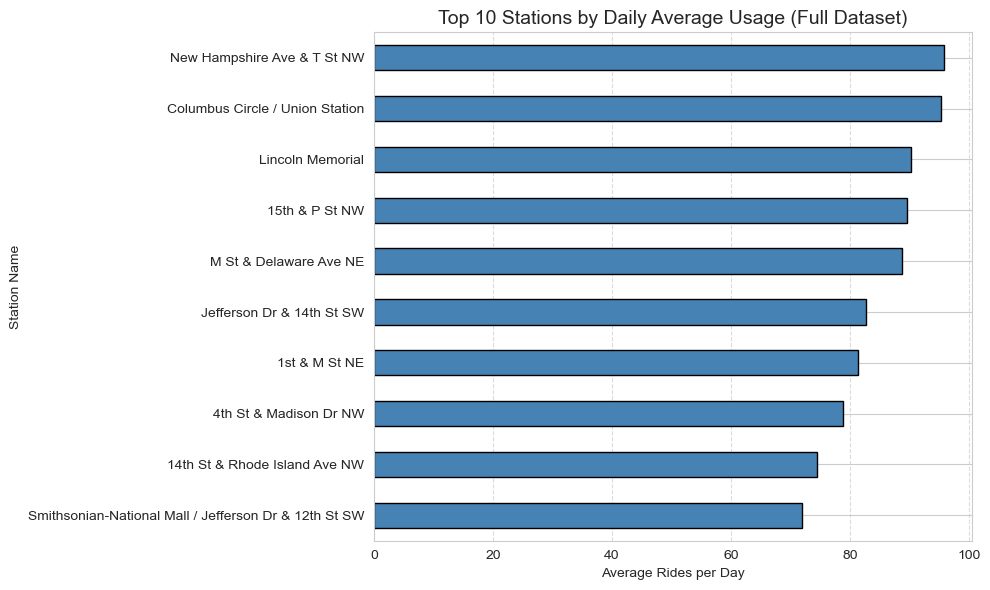

In [253]:
# 2. Günlük istasyon bazlı kullanım sayısı
daily_counts = df.groupby(["date", "start_station_name"]).size().reset_index(name="ride_count")

# 3. Günlük ortalama kullanım: istasyon bazında
station_daily_avg = daily_counts.groupby("start_station_name")["ride_count"].mean()

# 4. En çok kullanılan 10 istasyonu al
top_n = 10
top_stations_daily_avg = station_daily_avg.sort_values(ascending=False).head(top_n)

# 5. Bar chart çiz
plt.figure(figsize=(10, 6))
top_stations_daily_avg.sort_values().plot(kind="barh", color="steelblue", edgecolor="black")

# Başlık ve etiketler
plt.title(f"Top {top_n} Stations by Daily Average Usage (Full Dataset)", fontsize=14)
plt.xlabel("Average Rides per Day")
plt.ylabel("Station Name")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

THIS GRAPH IS REDUNDANT NOW, THERE'S THE SAME ONE WITH THE CAPACITY

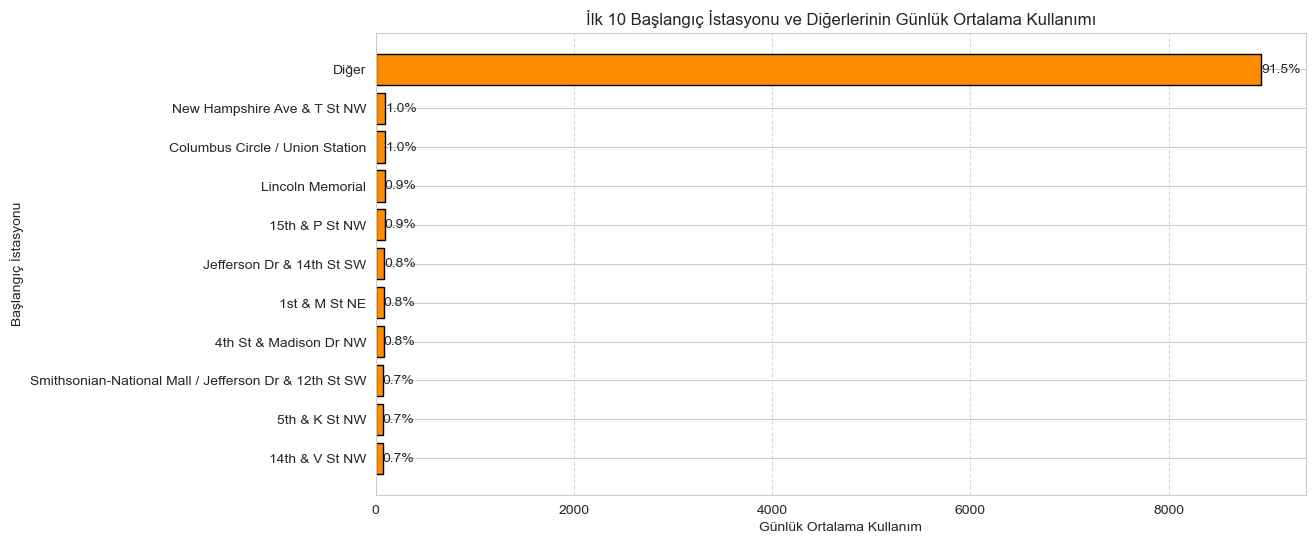

In [254]:
# Tüm istasyonların günlük ortalama kullanımını hesapla
daily_total_usage = df.groupby("date").size().mean()

# İlk 10 istasyonun günlük ortalamalarını hesapla
top_10_stations = df["start_station_name"].value_counts().head(10).index
daily_counts = df.groupby(["date", "start_station_name"]).size().reset_index(name="ride_count")
station_daily_avg = daily_counts[daily_counts["start_station_name"].isin(top_10_stations)]
station_daily_avg = station_daily_avg.groupby("start_station_name")["ride_count"].mean().sort_values()

# "Diğer" istasyonlar için günlük ortalama kullanım
other_daily_avg = daily_total_usage - station_daily_avg.sum()

# "Diğer" kategorisini ekleyelim
station_daily_avg_extended = pd.concat([station_daily_avg, pd.Series({"Diğer": other_daily_avg})])
station_daily_avg_percent_extended = (station_daily_avg_extended / daily_total_usage) * 100

# Yeni Güncellenmiş Grafik
plt.figure(figsize=(12, 6))
bars = plt.barh(station_daily_avg_extended.index, station_daily_avg_extended, color="darkorange", edgecolor="black")

# Çubukların içine yüzdelik oranları yazalım
for bar, percent in zip(bars, station_daily_avg_percent_extended):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{percent:.1f}%", va='center')

plt.title("İlk 10 Başlangıç İstasyonu ve Diğerlerinin Günlük Ortalama Kullanımı")
plt.xlabel("Günlük Ortalama Kullanım")
plt.ylabel("Başlangıç İstasyonu")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


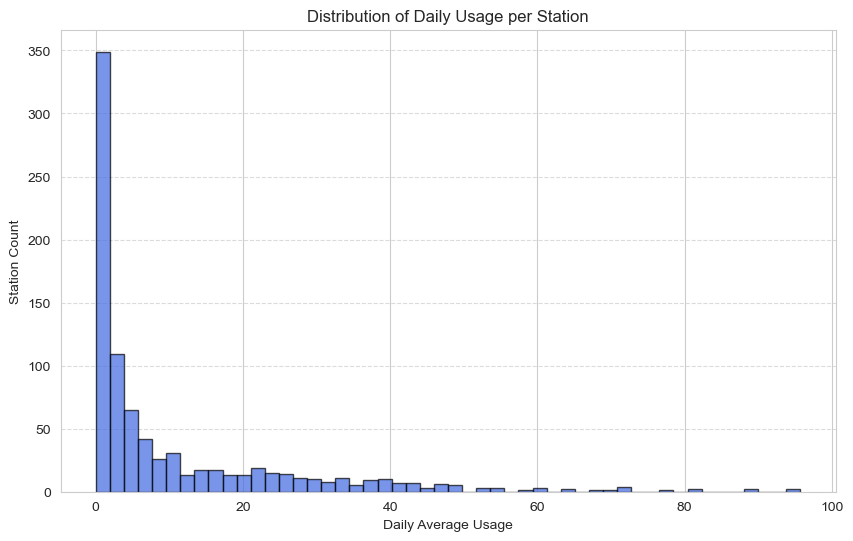

In [255]:
# Günlük kullanım ortalamasını hesapla
station_daily_usage = df.groupby("start_station_name").size() / df["date"].nunique()

# Histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(station_daily_usage, bins=50, color="royalblue", edgecolor="black", alpha=0.7)

plt.title("Distribution of Daily Usage per Station")
plt.xlabel("Daily Average Usage")
plt.ylabel("Station Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [256]:
# Günlük ortalama kullanım hesaplama
station_daily_usage = df.groupby("start_station_name").size() / df["date"].nunique()

# Çok az kullanılan istasyonları filtreleme (günde 5’ten az kullanılanlar)
low_usage_stations = station_daily_usage[station_daily_usage < 5]

# Çok az kullanılan istasyonları kaydetme
low_usage_stations_df = pd.DataFrame(low_usage_stations, columns=["Günlük Ortalama Kullanım"])
low_usage_stations_df = low_usage_stations_df.sort_values(by="Günlük Ortalama Kullanım")

# CSV olarak kaydetme
low_usage_stations_df.to_csv("low_usage_stations.csv", index=True)

# Çıktıyı kontrol etme
print(low_usage_stations_df.head())

                            Günlük Ortalama Kullanım
start_station_name                                  
10th & Rhode Island Ave NE                  0.000913
N Moore St & Rosslyn Metro                  0.000913
Kingsbridge Dr & Draper Dr                  0.001826
MTL-ECO5-03                                 0.001826
21st NW & E St NW                           0.001826


In [257]:
def clean_rides(df):
    """
    Filters out problematic rides based on ride_duration:
    - ride_duration <= 0 (invalid)
    - ride_duration < 3 minutes (likely cancelled/tests)
    - ride_duration > 90 minutes (outliers)

    Returns:
        df_cleaned: cleaned DataFrame
        summary: dictionary with clean and removed counts
    """
    # Temiz kayıtlar
    df_cleaned = df[
        (df["ride_duration"] > 0) &
        (df["ride_duration"].between(3, 90))
    ].copy()

    # Sayılar
    clean_count = df_cleaned.shape[0]
    removed_count = df.shape[0] - clean_count

    # Özet
    summary = {
        "Clean Rides": clean_count,
        "Removed Problematic Rides": removed_count
    }

    return df_cleaned, summary

In [258]:
df_cleaned, ride_cleaning_summary = clean_rides(df)

# Özet yazdır
for desc, val in ride_cleaning_summary.items():
    print(f"{desc}: {val:,} adet")

Clean Rides: 9,771,101 adet
Removed Problematic Rides: 922,896 adet


In [259]:
# İstasyon kapasitesi verisini yükleyelim
df_stations = pd.read_excel("/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/Capital_Bikeshare_Locations.xltx")

# İstasyon isimlerini eşleştirerek kapasite verisini ekleyelim
df_cleaned = df_cleaned.merge(
    df_stations[["NAME", "CAPACITY"]],
    left_on="start_station_name",
    right_on="NAME",
    how="left"
)

# station_name sütununu kaldır (gereksiz artık)
df_cleaned.drop(columns=["NAME"], inplace=True)

print("✅ İstasyon kapasitesi verisi eklendi!")

✅ İstasyon kapasitesi verisi eklendi!


In [260]:
# Günlük ortalama kullanım hesaplama
station_daily_usage = df_cleaned.groupby("start_station_name").size() / df_cleaned["date"].nunique()

# Çok az kullanılan istasyonları filtreleme (günde 5’ten az kullanılanlar)
low_usage_stations = station_daily_usage[station_daily_usage < 5]

# Çok az kullanılan istasyonları kaydetme
low_usage_stations_df = pd.DataFrame(low_usage_stations, columns=["Günlük Ortalama Kullanım"])
low_usage_stations_df = low_usage_stations_df.sort_values(by="Günlük Ortalama Kullanım")

# CSV olarak kaydetme
low_usage_stations_df.to_csv("low_usage_stations.csv", index=True)

# Çıktıyı kontrol etme
print(low_usage_stations_df.head())

                            Günlük Ortalama Kullanım
start_station_name                                  
10th & Rhode Island Ave NE                  0.000913
Prosperity Ave & Avenir Pl                  0.000913
MTL-ECO5-03                                 0.000913
N Moore St & Rosslyn Metro                  0.000913
21st NW & E St NW                           0.001826


In [261]:
# Harita
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Günlük ortalama hesapla
start_date = df_cleaned["started_at"].min().date()
end_date = df_cleaned["started_at"].max().date()
total_days = (end_date - start_date).days + 1

# Her istasyonun toplam kaç kez kullanıldığını bul
station_total_usage = df_cleaned["start_station_name"].value_counts()
station_daily_avg = (station_total_usage / total_days).round(2)

# Haritada sadece düşük kullanım istasyonlarını göster
for station_name in low_usage_stations_df.index:
    subset = df_cleaned[df_cleaned["start_station_name"] == station_name]

    if subset.empty:
        continue  # eşleşmeyen istasyonları atla

    station_data = subset.iloc[0]

    lat = station_data["start_lat"]
    lng = station_data["start_lng"]

    if pd.isna(lat) or pd.isna(lng):
        continue  # koordinatlar eksikse atla

    capacity = station_data["CAPACITY"]
    avg_usage = station_daily_avg.get(station_name, 0)

    capacity_text = f"{int(capacity)} docks" if pd.notnull(capacity) else "Unknown"

    popup_text = (
        f"<b>{station_name}</b><br>"
        f"Avg Daily Usage: {avg_usage} rides/day<br>"
        f"Station Capacity: {capacity_text}"
    )

    folium.CircleMarker(
        location=[lat, lng],
        radius=3,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
        popup=popup_text
    ).add_to(m)

# Haritayı kaydet
m.save("low_usage_stations_with_capacity.html")
m

In [262]:
# Problemli sürüşleri filtrele
very_short = df_original[df_original['ride_duration'] < 3]           # 3 dakikadan kısa
very_long = df_original[df_original['ride_duration'] > 90]           # 90 dakikadan uzun
negative = df_original[df_original['ride_duration'] <= 0]            # Negatif süreli

# Hepsini birleştir ve yinelenenleri kaldır
removed_rides = pd.concat([very_short, very_long, negative]).drop_duplicates()

# Geriye kalan "temiz" sürüşler
clean_rides = df_original[~df_original.index.isin(removed_rides.index)]

# Sayısal özet
total_rides = len(df_original)
removed_count = len(removed_rides)
clean_count = len(clean_rides)

# Kontrol
print(f"Total rides: {total_rides}")
print(f"Removed rides: {removed_count}")
print(f"Clean rides: {clean_count}")
print(f"Check: total == removed + clean? {total_rides == (removed_count + clean_count)}")

Total rides: 10693997
Removed rides: 922896
Clean rides: 9771101
Check: total == removed + clean? True


/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/757562794.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_problematic_rides, x="Month", y="Problematic Ride Count", palette="Set2")


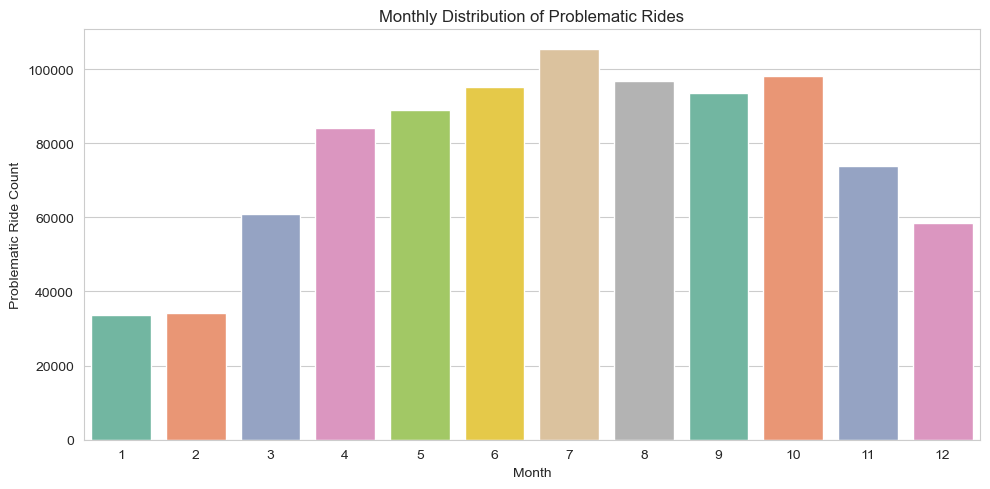

In [263]:
# removed_rides için datetime sütunlarını oluştur
removed_rides = removed_rides.copy()

# Tarih, ay ve sezon bilgileri
removed_rides["date"] = removed_rides["started_at"].dt.date
removed_rides["month"] = removed_rides["started_at"].dt.month
removed_rides["season"] = removed_rides["month"].map({
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
})

daily_problematic_rides = removed_rides.groupby("date").size().reset_index(name="Problematic Ride Count")
daily_problematic_rides.columns = ["Date", "Problematic Ride Count"]

monthly_problematic_rides = removed_rides.groupby("month").size().reset_index(name="Problematic Ride Count")
monthly_problematic_rides.columns = ["Month", "Problematic Ride Count"]

seasonal_problematic_rides = removed_rides.groupby("season").size().reset_index(name="Problematic Ride Count")
seasonal_problematic_rides.columns = ["Season", "Problematic Ride Count"]

# Aylık sürüşler için örnek grafik
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_problematic_rides, x="Month", y="Problematic Ride Count", palette="Set2")
plt.title("Monthly Distribution of Problematic Rides")
plt.tight_layout()
plt.show()

In [264]:
# 1️⃣ Başlangıç istasyonuna göre problemli sürüş sayısı
top_problematic_stations = removed_rides["start_station_name"].value_counts().head(20)

# 2️⃣ DataFrame'e çevir ve kaydet
problematic_stations_df = pd.DataFrame(top_problematic_stations).reset_index()
problematic_stations_df.columns = ["Station Name", "Problematic Rides Count"]
problematic_stations_df.to_csv("problematic_stations.csv", index=False)

# 3️⃣ Ekrana yazdır
print(problematic_stations_df)

                                         Station Name  Problematic Rides Count
0                           Jefferson Dr & 14th St SW                    11494
1   Smithsonian-National Mall / Jefferson Dr & 12t...                    11010
2                         New Hampshire Ave & T St NW                    10662
3                                    Lincoln Memorial                     9395
4                              4th St & Madison Dr NW                     9188
5                               17th & Corcoran St NW                     8993
6         Henry Bacon Dr & Lincoln Memorial Circle NW                     7914
7                                      15th & P St NW                     7220
8                     Columbus Circle / Union Station                     6487
9                Massachusetts Ave & Dupont Circle NW                     6176
10                        Adams Mill & Columbia Rd NW                     5699
11                                14th & Irving St N

In [265]:
# Çok az kullanılan istasyonları haritaya eklemek için önce bu istasyonların koordinatlarını bulmalıyız
low_usage_station_names = low_usage_stations_df.index

# Koordinat bilgisi olan veri çerçevesi oluştur (start_station_name, start_lat, start_lng)
station_coords = df.groupby("start_station_name")[["start_lat", "start_lng"]].first()

# Düşük kullanım istasyonlarının koordinatlarını al
low_usage_coords = station_coords.loc[station_coords.index.isin(low_usage_station_names)]

# Çok az kullanılan istasyonları seç
low_usage_station_names = low_usage_stations_df.index
low_usage_coords = station_coords.loc[station_coords.index.isin(low_usage_station_names)].dropna()

# En çok kullanılan istasyonları seç (ilk 10 veya 20)
top_usage_station_names = station_daily_usage.sort_values(ascending=False).head(200).index
top_usage_coords = station_coords.loc[station_coords.index.isin(top_usage_station_names)].dropna()

# Harita oluştur
washington_dc_coords = [38.9072, -77.0369]  # Washington DC merkezi
m = folium.Map(location=washington_dc_coords, zoom_start=12)

# Az kullanılan istasyonları mavi noktalarla ekleyelim
for idx, row in low_usage_coords.iterrows():
    folium.CircleMarker(
        location=[row["start_lat"], row["start_lng"]],
        radius=3,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.8,
        popup=f"Az Kullanılan: {idx}"
    ).add_to(m)

# Çok kullanılan istasyonları kırmızı noktalarla ekleyelim
for idx, row in top_usage_coords.iterrows():
    folium.CircleMarker(
        location=[row["start_lat"], row["start_lng"]],
        radius=3,  # Daha büyük yapalım çünkü önemli
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.4,
        popup=f"Popüler: {idx}"
    ).add_to(m)

# Haritayı kaydet ve göster
m.save("usage_comparison_map.html")
m

In [266]:
# 1. Toplam ve problemli sürüşleri hesapla
total_rides = df_original["start_station_name"].value_counts()
problem_rides = removed_rides["start_station_name"].value_counts()

# 2. Birleştir
station_usage = pd.DataFrame({
    "Total Rides": total_rides,
    "Problematic Rides": problem_rides
}).fillna(0)

# 3. Problem oranı
station_usage["Problem Rate (%)"] = (station_usage["Problematic Rides"] / station_usage["Total Rides"]) * 100

# 4. Koordinatları ekle
coords = df_original.groupby("start_station_name")[["start_lat", "start_lng"]].first()
station_usage = station_usage.join(coords)

# 5. Harita
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# 6. Renk skalası
colormap = cm.get_cmap("Reds")  # kırmızı tonlarında yoğunluk
norm = mcolors.Normalize(vmin=0, vmax=station_usage["Problem Rate (%)"].max())

# 7. Noktaları çiz
for station, row in station_usage.iterrows():
    if pd.notnull(row["start_lat"]) and pd.notnull(row["start_lng"]):
        color = mcolors.to_hex(colormap(norm(row["Problem Rate (%)"])))
        folium.CircleMarker(
    location=[row["start_lat"], row["start_lng"]],
    radius=3 + (row["Problem Rate (%)"] / 4),  # küçültülmüş boyut
    color='black',             # dış çizgi rengi
    weight=1.5,                # dış çizgi kalınlığı (varsayılan 1)
    fill=True,
    fill_color=color,         # iç renk: problem oranına göre
    fill_opacity=0.8,         # iç dolgu opaklığı (biraz artırdım)
    popup=(
        f"<b>{station}</b><br>"
        f"Total Rides: {int(row['Total Rides']):,}<br>"
        f"Problematic Rides: {int(row['Problematic Rides']):,}<br>"
        f"Problem Rate: {row['Problem Rate (%)']:.2f}%"
    )
).add_to(m)

# 8. Kaydet ve göster
m.save("station_problem_rate_map.html")
m

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/4287443940.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("Reds")  # kırmızı tonlarında yoğunluk


In [267]:
# 1. Negatif veya sıfır süreli yolculukları kontrol edelim
negative_duration_rides = df[df["ride_duration"] <= 0]

# 2. Çok kısa süren (1 dakikadan kısa) yolculukları kontrol edelim
short_rides = df[df["ride_duration"] < 3]

# 3. Aşırı uzun süren (örneğin 3 saatten uzun) yolculukları kontrol edelim
long_rides = df[df["ride_duration"] > 90]  # 180 dakika = 1.5 saat

# Sorunlu yolculukları özetleyelim
problematic_rides_summary = {
    "Negatif veya Sıfır Süreli": negative_duration_rides.shape[0],
    "Çok Kısa (<3 dk)": short_rides.shape[0],
    "Çok Uzun (>1.5 saat)": long_rides.shape[0]
}

# Özet tablosunu gösterelim
for problem, count in problematic_rides_summary.items():
    print(f"{problem} Yolculuklar: {count} adet")

Negatif veya Sıfır Süreli Yolculuklar: 2222 adet
Çok Kısa (<3 dk) Yolculuklar: 679828 adet
Çok Uzun (>1.5 saat) Yolculuklar: 243068 adet


In [268]:
# Sorunlu sürüşleri özetleyen tabloyu oluştur
problematic_rides_df = pd.DataFrame({
    "Problem Type": ["Negative or Zero Ride Duration", "Too Short (<3 min)", "Too Long (>1.5 hours)"],
    "Ride Count": [negative_duration_rides.shape[0], short_rides.shape[0], long_rides.shape[0]]
})

# CSV olarak kaydet
problematic_rides_df.to_csv("problematic_rides_summary_before_cleaning.csv", index=False)

# Tablonun çıktısını gör
print(problematic_rides_df)

                     Problem Type  Ride Count
0  Negative or Zero Ride Duration        2222
1              Too Short (<3 min)      679828
2           Too Long (>1.5 hours)      243068


In [269]:
# df_cleaned, summary = clean_rides(df_original)
# print(df_cleaned.columns)

In [270]:
log_text = """
Capital Bikeshare – Data Cleaning Log
Date: 2025-03-21

1. Negative or Zero Duration Rides
   - Condition: ride_duration <= 0
   - Reason: Likely system errors
   - Removed: 2,222 records

2. Very Short Rides
   - Condition: ride_duration < 3 minutes
   - Reason: Possible test/cancelled rides
   - Removed: 679,828 records

3. Very Long Rides
   - Condition: ride_duration > 90 minutes
   - Reason: Outliers or anomalies
   - Removed: 243,068 records

Total Removed: 922,896
Remaining Clean Rides: 9,771,101
Total Rides Before Cleaning: 10,693,997
Cleaned DataFrame: df_cleaned
"""

with open("cleaning_log.txt", "w") as f:
    f.write(log_text)

In [271]:
try:
    print(removed_rides.shape)
except NameError as e:
    print("HATA:", e)

(922896, 17)


In [272]:
print(df_original.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_duration'],
      dtype='object')


/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/2794763939.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


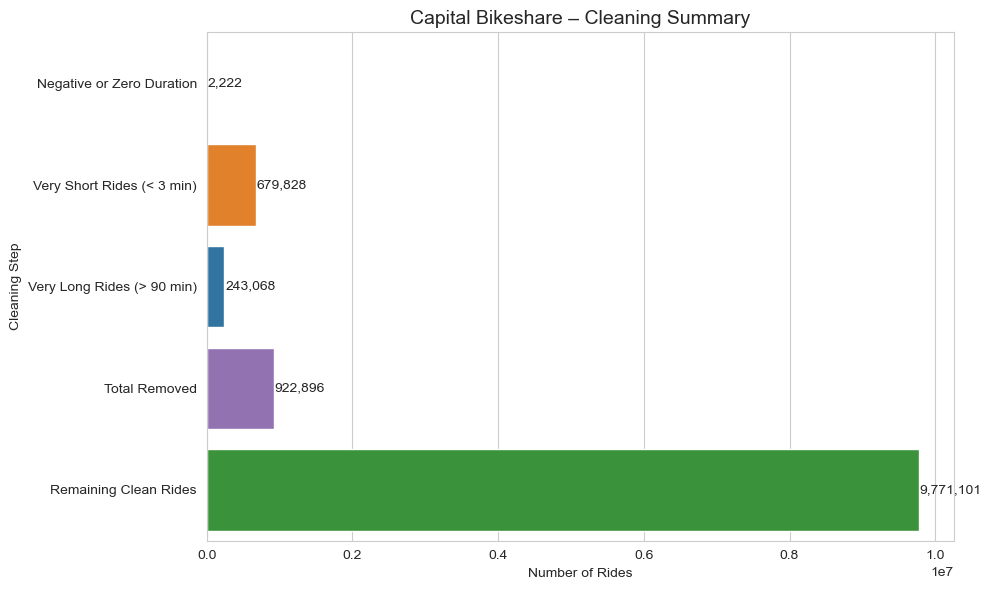

In [273]:
# Data for the visual log
data = {
    "Cleaning Step": [
        "Negative or Zero Duration",
        "Very Short Rides (< 3 min)",
        "Very Long Rides (> 90 min)",
        "Total Removed",
        "Remaining Clean Rides"
    ],
    "Ride Count": [
        2222,
        679828,
        243068,
        922896,
        9771101
    ]
}

df_log = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = ["#d62728", "#ff7f0e", "#1f77b4", "#9467bd", "#2ca02c"]

barplot = sns.barplot(
    data=df_log,
    x="Ride Count",
    y="Cleaning Step",
    palette=palette
)

# Add value labels
for i, val in enumerate(df_log["Ride Count"]):
    barplot.text(val + 10000, i, f"{val:,}", va='center')

# Titles and labels
plt.title("Capital Bikeshare – Cleaning Summary", fontsize=14)
plt.xlabel("Number of Rides")
plt.ylabel("Cleaning Step")
plt.tight_layout()

plt.show()

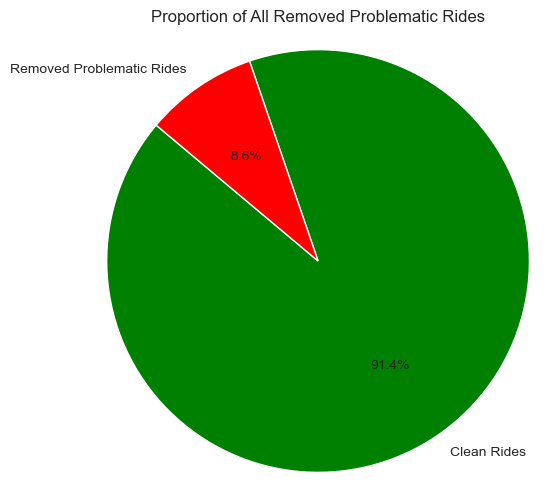

In [274]:
labels = ["Clean Rides", "Removed Problematic Rides"]
sizes = [clean_count, removed_count]
colors = ["green", "red"]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Proportion of All Removed Problematic Rides")
plt.axis("equal")
plt.show()

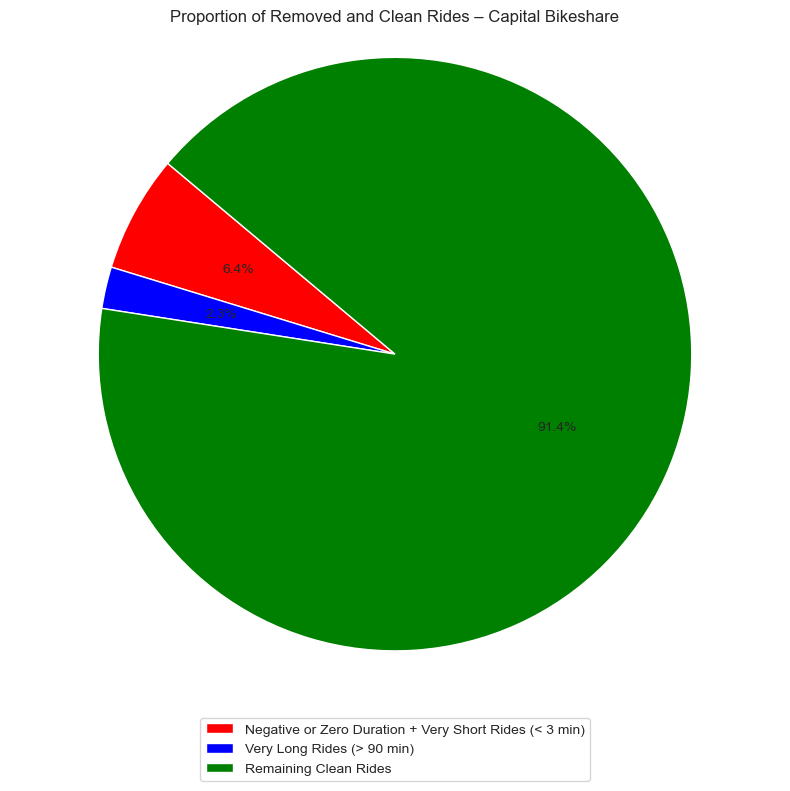

In [275]:
# Data
labels = [
    "Negative or Zero Duration + Very Short Rides (< 3 min)",
    "Very Long Rides (> 90 min)",
    "Remaining Clean Rides"
]
sizes = [682050, 243068, 9771101]
colors = ["red", "blue", "green"]

# Create pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    autopct="%1.1f%%",
    startangle=140
)

# Add legend below the chart
plt.legend(patches, labels, loc="upper center", bbox_to_anchor=(0.5, -0.05))

plt.title("Proportion of Removed and Clean Rides – Capital Bikeshare")
plt.axis("equal")
plt.tight_layout()
plt.show()

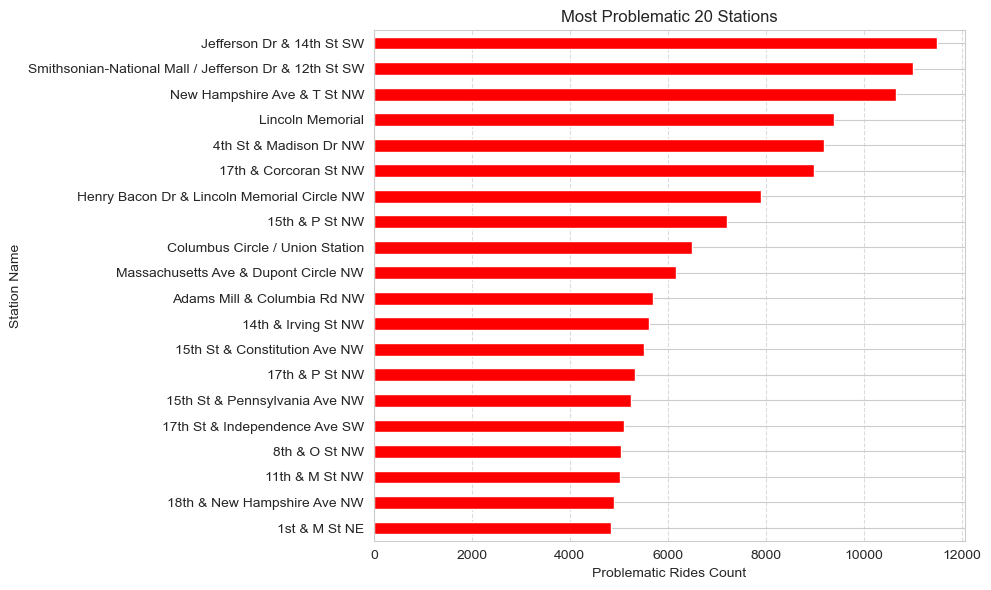

In [276]:
# Top 20 istasyon
station_wise_problematic_rides = removed_rides["start_station_name"].value_counts().head(20)

plt.figure(figsize=(10, 6))
station_wise_problematic_rides.sort_values().plot(kind="barh", color="red")
plt.xlabel("Problematic Rides Count")
plt.ylabel("Station Name")
plt.title("Most Problematic 20 Stations")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

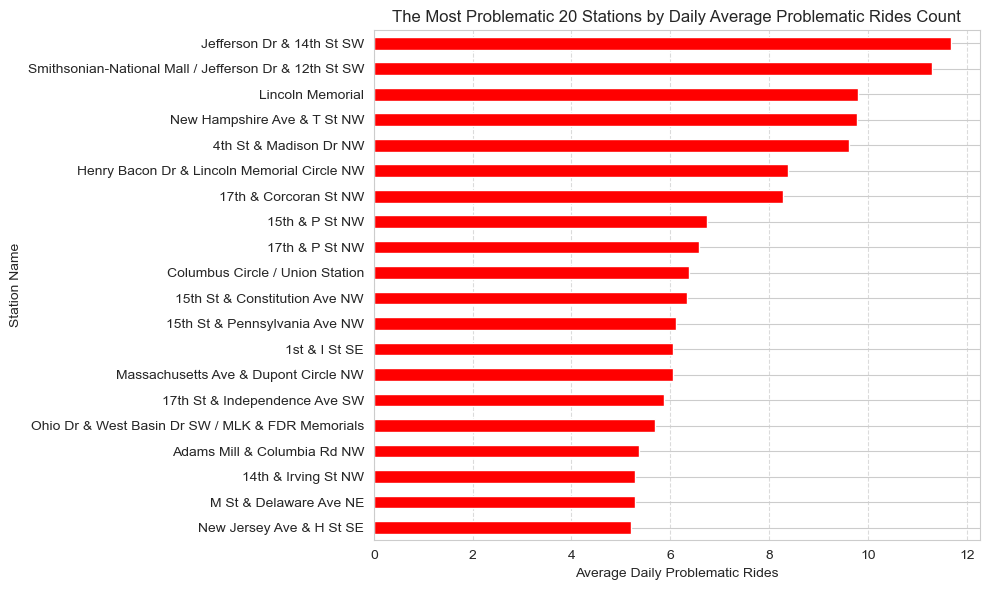

In [277]:
# Başlangıç tarihi sadece gün olarak alınır
removed_rides["date"] = pd.to_datetime(removed_rides["started_at"]).dt.date

# Günlük bazda her istasyondaki problemli sürüşler sayılır
daily_counts = removed_rides.groupby(["start_station_name", "date"]).size().reset_index(name="daily_problem_count")

# Her istasyon için günlük ortalama problemli sürüş sayısı hesaplanır
avg_daily_problems = daily_counts.groupby("start_station_name")["daily_problem_count"].mean().sort_values(ascending=False).head(20)

# Grafik çizimi
plt.figure(figsize=(10, 6))
avg_daily_problems.sort_values().plot(kind="barh", color="red")
plt.xlabel("Average Daily Problematic Rides")
plt.ylabel("Station Name")
plt.title("The Most Problematic 20 Stations by Daily Average Problematic Rides Count")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [278]:
# Temizlenmiş veri setini CSV olarak kaydedelim
df_cleaned.to_csv("CBS_Cleaned.csv", index=False)


In [279]:
df_cleaned.to_csv("/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/CBS_Cleaned.csv", index=False)

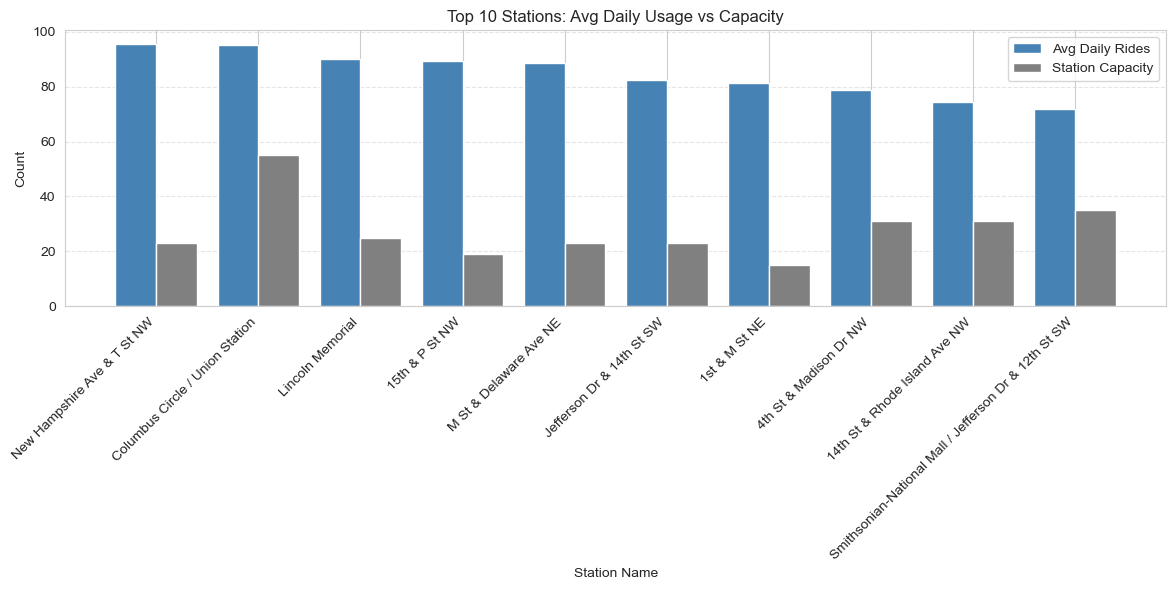

In [280]:
# 1. "date" sütunu yoksa oluştur
df["started_at"] = pd.to_datetime(df["started_at"])
df["date"] = df["started_at"].dt.date

# 2. Günlük ortalama kullanım (tüm veriyle)
daily_counts = df.groupby(["date", "start_station_name"]).size().reset_index(name="ride_count")
station_daily_avg = daily_counts.groupby("start_station_name")["ride_count"].mean()

# 3. İstasyon kapasitesi verisini oku
df_stations = pd.read_excel("/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/Capital_Bikeshare_Locations.xltx")

# 4. Günlük ortalama ile kapasiteyi birleştir
combined = pd.DataFrame(station_daily_avg).reset_index().rename(columns={"ride_count": "avg_daily_rides"})
combined = combined.merge(df_stations[["NAME", "CAPACITY"]], left_on="start_station_name", right_on="NAME", how="left")
combined.drop(columns=["NAME"], inplace=True)

# 5. En yoğun 10 istasyonu al
top_n = 10
top_combined = combined.sort_values(by="avg_daily_rides", ascending=False).head(top_n)
top_combined.set_index("start_station_name", inplace=True)

# 6. Grafik çizimi
plt.figure(figsize=(12, 6))

bar_width = 0.4
x = range(len(top_combined))

# Barlar: Günlük ortalama kullanım (mavi) ve kapasite (gri)
plt.bar(x, top_combined["avg_daily_rides"], width=bar_width, label="Avg Daily Rides", color="steelblue")
plt.bar([i + bar_width for i in x], top_combined["CAPACITY"], width=bar_width, label="Station Capacity", color="gray")

# Etiketler ve başlık
plt.xticks([i + bar_width / 2 for i in x], top_combined.index, rotation=45, ha="right")
plt.xlabel("Station Name")
plt.ylabel("Count")
plt.title("Top 10 Stations: Avg Daily Usage vs Capacity")
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

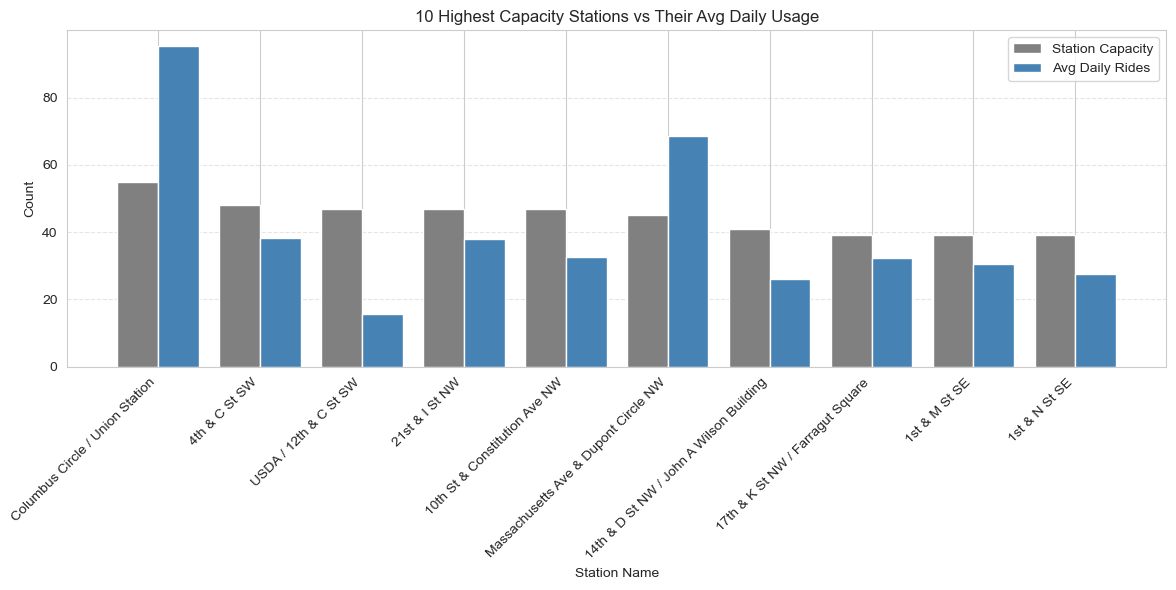

In [281]:
# 1. İhtiyacımız olan sütunları al: istasyon ismi + kapasite + ortalama sürüş
top_capacity = combined[["start_station_name", "CAPACITY", "avg_daily_rides"]].sort_values(
    by="CAPACITY", ascending=False
).head(10).set_index("start_station_name")

# 2. Grafik çizimi
plt.figure(figsize=(12, 6))

bar_width = 0.4
x = range(len(top_capacity))

# Barlar: Kapasite (gri) ve günlük ortalama kullanım (mavi)
plt.bar(x, top_capacity["CAPACITY"], width=bar_width, label="Station Capacity", color="gray")
plt.bar([i + bar_width for i in x], top_capacity["avg_daily_rides"], width=bar_width, label="Avg Daily Rides", color="steelblue")

# Etiketler ve başlık
plt.xticks([i + bar_width / 2 for i in x], top_capacity.index, rotation=45, ha="right")
plt.xlabel("Station Name")
plt.ylabel("Count")
plt.title("10 Highest Capacity Stations vs Their Avg Daily Usage")
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

In [316]:
# En çok kullanılan 10 istasyon
top_usage_names = set(top_usage["start_station_name"])

# En yüksek kapasiteli 10 istasyon
top_capacity_names = set(top_capacity.index)

# Kesişim
intersection = top_usage_names.intersection(top_capacity_names)
print("Both in Top Usage and Top Capacity:", intersection)

Both in Top Usage and Top Capacity: {'Columbus Circle / Union Station'}


In [ ]:
# Daha geniş kümeler: ilk 30
top_usage_30 = combined.sort_values(by="avg_daily_rides", ascending=False).head(30)
top_capacity_30 = combined.sort_values(by="CAPACITY", ascending=False).head(30)

# İsim kümeleri
usage_names_30 = set(top_usage_30["start_station_name"])
capacity_names_30 = set(top_capacity_30["start_station_name"])

# Kesişim
intersection_30 = usage_names_30.intersection(capacity_names_30)
print(f"Top 30 usage vs capacity overlap: {len(intersection_30)} istasyon\n", intersection_30)

Top 30 usage vs capacity overlap: 6 istasyon
 {'4th St & Madison Dr NW', 'Thomas Circle', 'Smithsonian-National Mall / Jefferson Dr & 12th St SW', 'Massachusetts Ave & Dupont Circle NW', 'Columbus Circle / Union Station', '14th St & Rhode Island Ave NW'}


In [301]:
# İstasyon adı bazlı gruplama ile koordinat eksiklerini doldurma
combined["start_lat"] = combined.groupby("start_station_name")["start_lat"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))
combined["start_lng"] = combined.groupby("start_station_name")["start_lng"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/3289468854.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined["start_lat"] = combined.groupby("start_station_name")["start_lat"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))
/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/3289468854.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined["start_lng"] = combined.groupby("start_station_name")["start_lng"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))


In [304]:
map_data_clean = combined[combined["top30_group"].isin(["both", "usage_only", "capacity_only"])]
map_data_clean = map_data_clean.dropna(subset=["start_lat", "start_lng"])

In [303]:
# 1. Eksik koordinatları doldur
combined["start_lat"] = combined.groupby("start_station_name")["start_lat"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))
combined["start_lng"] = combined.groupby("start_station_name")["start_lng"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))

# 2. Top 30 usage ve capacity kümeleri
top_usage_30 = combined.sort_values(by="avg_daily_rides", ascending=False).head(30)
top_capacity_30 = combined.sort_values(by="CAPACITY", ascending=False).head(30)

usage_names_30 = set(top_usage_30["start_station_name"])
capacity_names_30 = set(top_capacity_30["start_station_name"])
intersection_names = usage_names_30.intersection(capacity_names_30)

# 3. Grup ataması
def categorize(station_name):
    if station_name in intersection_names:
        return "both"
    elif station_name in usage_names_30:
        return "usage_only"
    elif station_name in capacity_names_30:
        return "capacity_only"
    else:
        return "other"

combined["top30_group"] = combined["start_station_name"].apply(categorize)

# 4. Harita verisi → sadece 3 grup
map_data = combined[combined["top30_group"].isin(["both", "usage_only", "capacity_only"])]
map_data = map_data.dropna(subset=["start_lat", "start_lng"])

# 5. Harita oluştur
m = folium.Map(location=[map_data["start_lat"].mean(), map_data["start_lng"].mean()], zoom_start=13)

# Renk eşleştirme
color_map = {
    "both": "green",
    "usage_only": "red",
    "capacity_only": "orange"
}

# 6. Haritaya istasyonları ekle
for _, row in map_data.iterrows():
    group = row["top30_group"]
    popup_text = f"{row['start_station_name']}<br>Avg Daily Rides: {row['avg_daily_rides']:.0f}<br>Capacity: {row['CAPACITY']}"
    folium.CircleMarker(
        location=[row["start_lat"], row["start_lng"]],
        radius=8,
        popup=popup_text,
        color=color_map[group],
        fill=True,
        fill_color=color_map[group],
        fill_opacity=0.8
    ).add_to(m)

m.save("/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/Top_30_Station_Overlap_Map.html")
m

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/435408194.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined["start_lat"] = combined.groupby("start_station_name")["start_lat"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))
/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/435408194.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined["start_lng"] = combined.groupby("start_station_name")["start_lng"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))


In [285]:
# 1. İlk küme: problemli ilk 20 istasyon
top_problematic_stations = set(avg_daily_problems.index)

# 2. İkinci küme: haritadaki istasyonlar (kategorilere ayrılmış olanlar)
top30_station_names = set(map_data["start_station_name"])

# 3. Kesişim
problematic_overlap = top_problematic_stations.intersection(top30_station_names)

# 4. Sonuç
print(f"Number of overlapping stations: {len(problematic_overlap)}")
print("Overlapping stations:", problematic_overlap)

Number of overlapping stations: 15
Overlapping stations: {'1st & I St SE', 'M St & Delaware Ave NE', '15th & P St NW', 'Jefferson Dr & 14th St SW', 'Henry Bacon Dr & Lincoln Memorial Circle NW', 'New Hampshire Ave & T St NW', '4th St & Madison Dr NW', 'Lincoln Memorial', 'Smithsonian-National Mall / Jefferson Dr & 12th St SW', '17th & P St NW', 'Massachusetts Ave & Dupont Circle NW', '17th & Corcoran St NW', 'Columbus Circle / Union Station', 'Ohio Dr & West Basin Dr SW / MLK & FDR Memorials', '14th & Irving St NW'}


In [305]:
# 1. Eksik koordinatları dolduralım (gerekirse)
combined["start_lat"] = combined.groupby("start_station_name")["start_lat"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))
combined["start_lng"] = combined.groupby("start_station_name")["start_lng"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))

# 2. Gruplar
top_usage_30 = combined.sort_values(by="avg_daily_rides", ascending=False).head(30)
top_capacity_30 = combined.sort_values(by="CAPACITY", ascending=False).head(30)

usage_names_30 = set(top_usage_30["start_station_name"])
capacity_names_30 = set(top_capacity_30["start_station_name"])
intersection_names = usage_names_30.intersection(capacity_names_30)

# 3. Grup ataması
def categorize(station_name):
    if station_name in intersection_names:
        return "both"
    elif station_name in usage_names_30:
        return "usage_only"
    elif station_name in capacity_names_30:
        return "capacity_only"
    else:
        return "other"

combined["top30_group"] = combined["start_station_name"].apply(categorize)

# 4. Harita verisi
map_data = combined[combined["top30_group"].isin(["both", "usage_only", "capacity_only"])]
map_data = map_data.dropna(subset=["start_lat", "start_lng"])

# 5. Problemli istasyon listesi (ilk 20'den gelen 15 istasyon)
problematic_overlap = {
    '1st & I St SE', 'M St & Delaware Ave NE', '15th & P St NW', 'Jefferson Dr & 14th St SW',
    'Henry Bacon Dr & Lincoln Memorial Circle NW', 'New Hampshire Ave & T St NW',
    '4th St & Madison Dr NW', 'Lincoln Memorial', 'Smithsonian-National Mall / Jefferson Dr & 12th St SW',
    '17th & P St NW', 'Massachusetts Ave & Dupont Circle NW', '17th & Corcoran St NW',
    'Columbus Circle / Union Station', 'Ohio Dr & West Basin Dr SW / MLK & FDR Memorials', '14th & Irving St NW'
}

# 6. Renk eşleştirme
color_map = {
    "both": "green",
    "usage_only": "red",
    "capacity_only": "orange"
}

# 7. Haritayı oluştur
m = folium.Map(location=[map_data["start_lat"].mean(), map_data["start_lng"].mean()], zoom_start=13)

# 8. Haritaya istasyonları ekle
for _, row in map_data.iterrows():
    group = row["top30_group"]
    popup_text = f"{row['start_station_name']}<br>Avg Daily Rides: {row['avg_daily_rides']:.0f}<br>Capacity: {row['CAPACITY']}"
    
    folium.CircleMarker(
        location=[row["start_lat"], row["start_lng"]],
        radius=8,
        popup=popup_text,
        color="black" if row["start_station_name"] in problematic_overlap else color_map[group],
        fill=True,
        fill_color=color_map[group],
        fill_opacity=0.8,
        weight=3 if row["start_station_name"] in problematic_overlap else 1
    ).add_to(m)

m.save("/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/Top_30_Station_Overlap_Problems_Map.html")
m


/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/2888952863.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined["start_lat"] = combined.groupby("start_station_name")["start_lat"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))
/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/2888952863.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined["start_lng"] = combined.groupby("start_station_name")["start_lng"].transform(lambda x: x.fillna(method="bfill").fillna(method="ffill"))


In [307]:
# Yeni metrik: kullanım başına kapasite oranı (yoğunluk / kapasite)
combined["usage_to_capacity_ratio"] = combined["avg_daily_rides"] / combined["CAPACITY"]

# 1. En düşük kapasiteli ama en yüksek oranlı istasyonlar (küçük ama aşırı yoğun)
smallest_capacity_high_demand = combined.sort_values(by=["CAPACITY", "usage_to_capacity_ratio"], ascending=[True, False]).head(5)

# 2. En yüksek kapasiteli ama düşük oranlı istasyonlar (büyük ama verimsiz)
largest_capacity_low_demand = combined.sort_values(by=["CAPACITY", "usage_to_capacity_ratio"], ascending=[False, True]).head(5)

# Gösterelim
print("\n🚴 Stations with LOW Capacity but HIGH Demand:")
print(smallest_capacity_high_demand[["avg_daily_rides", "CAPACITY", "usage_to_capacity_ratio"]])

print("\n🪑 Stations with HIGH Capacity but LOW Demand:")
print(largest_capacity_low_demand[["avg_daily_rides", "CAPACITY", "usage_to_capacity_ratio"]])


🚴 Stations with LOW Capacity but HIGH Demand:
     avg_daily_rides  CAPACITY  usage_to_capacity_ratio
406         1.318021       9.0                 0.146447
192        27.797804      11.0                 2.527073
179        23.335180      11.0                 2.121380
66         16.860678      11.0                 1.532789
224        16.563985      11.0                 1.505817

🪑 Stations with HIGH Capacity but LOW Demand:
     avg_daily_rides  CAPACITY  usage_to_capacity_ratio
322        95.228704      55.0                 1.731431
188        38.148624      48.0                 0.794763
780        15.738028      47.0                 0.334852
9          32.715349      47.0                 0.696071
138        37.856881      47.0                 0.805466


In [289]:
# Eğer daha önce eklediysen, eski koordinat sütunlarını kaldır
combined = combined.drop(columns=["start_lat", "start_lng"], errors="ignore")

# 1. Koordinatları içeren istasyon verisini hazırla
df_stations_subset = df_stations[["NAME", "LATITUDE", "LONGITUDE"]]
df_stations_subset.columns = ["start_station_name", "start_lat", "start_lng"]

# 2. Koordinatları combined'a ekle
combined = combined.merge(df_stations_subset, on="start_station_name", how="left")

# 3. Günlük olarak istasyonlara bırakılan bisiklet sayısını hesapla
df["started_at"] = pd.to_datetime(df["started_at"])
df["date"] = df["started_at"].dt.date
daily_ended = df.groupby(["date", "end_station_name"]).size().reset_index(name="ended_rides")
station_daily_ended = daily_ended.groupby("end_station_name")["ended_rides"].mean().reset_index()

# 4. end_station_name’i start_station_name olarak yeniden adlandır
station_daily_ended.rename(columns={"end_station_name": "start_station_name", "ended_rides": "avg_daily_returns"}, inplace=True)

# 5. avg_daily_returns sütununu combined’a ekle
combined = combined.merge(station_daily_ended, on="start_station_name", how="left")

In [308]:
# En düşük kapasiteli ama yoğun kullanılan 20 istasyon
low_capacity_high_demand = combined.sort_values(by=["CAPACITY", "usage_to_capacity_ratio"], ascending=[True, False]).head(20)

# En yüksek kapasiteli ama düşük kullanılan 20 istasyon
high_capacity_low_demand = combined.sort_values(by=["CAPACITY", "usage_to_capacity_ratio"], ascending=[False, True]).head(20)

# Harita merkezi
washington_dc_coords = [38.9072, -77.0369]
m = folium.Map(location=washington_dc_coords, zoom_start=12)

# Renk skalası (kırmızı tonları), en yüksek usage_to_capacity_ratio'a göre normalize et
vmax = max(low_capacity_high_demand["usage_to_capacity_ratio"].max(), high_capacity_low_demand["usage_to_capacity_ratio"].max())
colormap = cm.get_cmap("Reds")
norm = mcolors.Normalize(vmin=0, vmax=vmax)

# Düşük kapasiteli ama yüksek kullanım istasyonlarını haritaya ekleyelim (kırmızı tonlar)
for idx, row in low_capacity_high_demand.iterrows():
    if pd.notnull(row.get("start_lat")) and pd.notnull(row.get("start_lng")):
        color = mcolors.to_hex(colormap(norm(row["usage_to_capacity_ratio"])))
        folium.CircleMarker(
            location=[row["start_lat"], row["start_lng"]],
            radius=5 + (row["usage_to_capacity_ratio"]),  # yoğunluk arttıkça büyüsün
            color='black',
            weight=1.5,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=(
                f"<b>{idx}</b><br>"
                f"Avg Daily Rides (Started): {row['avg_daily_rides']:.1f}<br>"
                f"Avg Daily Rides (Returned): {row['avg_daily_returns']:.1f}<br>"
                f"Capacity: {int(row['CAPACITY'])}<br>"
                f"Usage/Capacity Ratio: {row['usage_to_capacity_ratio']:.2f}"
            )
        ).add_to(m)

# Yüksek kapasiteli ama düşük kullanım istasyonlarını ekleyelim (gri ton)
for idx, row in high_capacity_low_demand.iterrows():
    if pd.notnull(row.get("start_lat")) and pd.notnull(row.get("start_lng")):
        color = "#999999"  # sabit gri
        folium.CircleMarker(
            location=[row["start_lat"], row["start_lng"]],
            radius=5,
            color='black',
            weight=1.5,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=(
                f"<b>{idx}</b><br>"
                f"Avg Daily Rides (Started): {row['avg_daily_rides']:.1f}<br>"
                f"Avg Daily Rides (Returned): {row['avg_daily_returns']:.1f}<br>"
                f"Avg Daily Rides: {row['avg_daily_rides']:.1f}<br>"
                f"Capacity: {int(row['CAPACITY'])}<br>"
                f"Usage/Capacity Ratio: {row['usage_to_capacity_ratio']:.2f}"
            )
        ).add_to(m)

# Haritayı kaydet
m.save("capacity_vs_usage_map.html")
m

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/3105086094.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("Reds")


In [309]:
# Net değişimi yeniden hesaplayalım (güncel veri için)
combined["net_change"] = combined["avg_daily_returns"] - combined["avg_daily_rides"]

# En düşük kapasiteli ama yoğun kullanılan 20 istasyon
low_capacity_high_demand = combined.sort_values(by=["CAPACITY", "usage_to_capacity_ratio"], ascending=[True, False]).head(20)

# En yüksek kapasiteli ama düşük kullanılan 20 istasyon
high_capacity_low_demand = combined.sort_values(by=["CAPACITY", "usage_to_capacity_ratio"], ascending=[False, True]).head(20)

# Harita oluştur
washington_dc_coords = [38.9072, -77.0369]
m = folium.Map(location=washington_dc_coords, zoom_start=12)

# Renk skalası
vmax = max(low_capacity_high_demand["usage_to_capacity_ratio"].max(),
           high_capacity_low_demand["usage_to_capacity_ratio"].max())
colormap = cm.get_cmap("Reds")
norm = mcolors.Normalize(vmin=0, vmax=vmax)

# Tüm istasyonları birleştirelim (ayrım için etiket kullanalım)
combined_stations = pd.concat([
    low_capacity_high_demand.assign(group="low_capacity_high_demand"),
    high_capacity_low_demand.assign(group="high_capacity_low_demand")
])

# Noktaları çiz
for idx, row in combined_stations.iterrows():
    if pd.notnull(row.get("start_lat")) and pd.notnull(row.get("start_lng")):
        usage_ratio = row["usage_to_capacity_ratio"]
        
        # Renk ve boyut: oranla orantılı
        color = mcolors.to_hex(colormap(norm(usage_ratio)))
        radius = 5 + usage_ratio  # yoğunluk arttıkça büyüsün

        folium.CircleMarker(
            location=[row["start_lat"], row["start_lng"]],
            radius=radius,
            color='black',
            weight=1.5,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=(
                f"<b>{idx}</b><br>"
                f"Avg Daily Rides (Started): {row['avg_daily_rides']:.1f}<br>"
                f"Avg Daily Rides (Returned): {row['avg_daily_returns']:.1f}<br>"
                f"Net Change: {row['net_change']:.1f}<br>"
                f"Capacity: {int(row['CAPACITY'])}<br>"
                f"Usage/Capacity Ratio: {usage_ratio:.2f}"
            )
        ).add_to(m)

# Haritayı kaydet
m.save("capacity_vs_usage_visual_map.html")
m

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/895272381.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("Reds")


In [134]:
# 1. Tarih sütunu oluştur
df["started_at"] = pd.to_datetime(df["started_at"])
df["year"] = df["started_at"].dt.year

# 2. Problemli sürüşleri filtrele
problematic_rides = df[
    (df["ride_duration"] <= 0) |
    (df["ride_duration"] < 3) |
    (df["ride_duration"] > 90)
]

# 3. Yıllık toplamlara göre KPI tablosu
yearly_total = df.groupby("year").size()
yearly_problematic = problematic_rides.groupby("year").size()
yearly_problem_rate = (yearly_problematic / yearly_total * 100).round(2)

# 4. KPI tablosu
kpi_summary = pd.DataFrame({
    "Year": yearly_total.index,
    "Total Rides": yearly_total.values,
    "Problematic Rides": yearly_problematic.values,
    "Problem Rate (%)": yearly_problem_rate.values
})

print(kpi_summary)

   Year  Total Rides  Problematic Rides  Problem Rate (%)
0  2021      2749881             216184              7.86
1  2022      3476782             285823              8.22
2  2023      4467334             420889              9.42


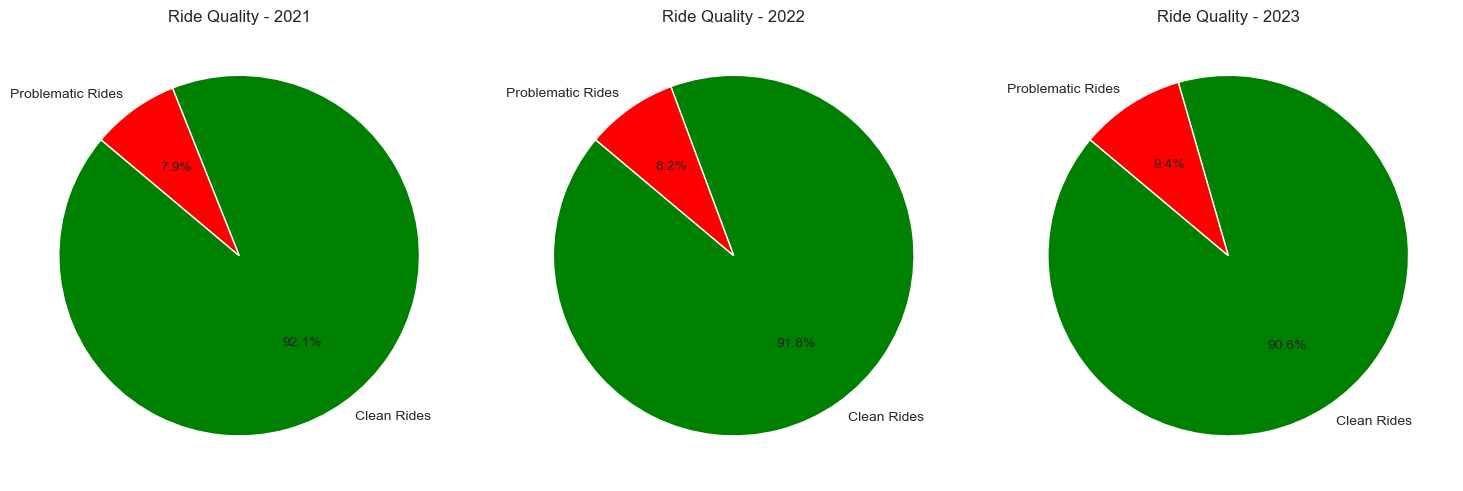

In [135]:
# KPI verileri
years = ["2021", "2022", "2023"]
problem_rates = [7.86, 8.22, 9.42]
clean_rates = [100 - rate for rate in problem_rates]

# Her yıl için pie chart oluşturalım
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    axes[i].pie(
        [clean_rates[i], problem_rates[i]],
        labels=["Clean Rides", "Problematic Rides"],
        colors=["green", "red"],
        autopct="%1.1f%%",
        startangle=140
    )
    axes[i].set_title(f"Ride Quality - {years[i]}")

plt.tight_layout()
plt.show()

In [136]:
total_rides = len(df_original)
removed_count = len(removed_rides)
clean_count = len(clean_rides)

retention_rate = (clean_count / total_rides) * 100

print(f"Total rides: {total_rides}")
print(f"Removed rides: {removed_count}")
print(f"Clean rides: {clean_count}")
print(f"Retention Rate: {retention_rate:.2f}%")

Total rides: 10693997
Removed rides: 922896
Clean rides: 9771101
Retention Rate: 91.37%


<Figure size 1400x700 with 0 Axes>

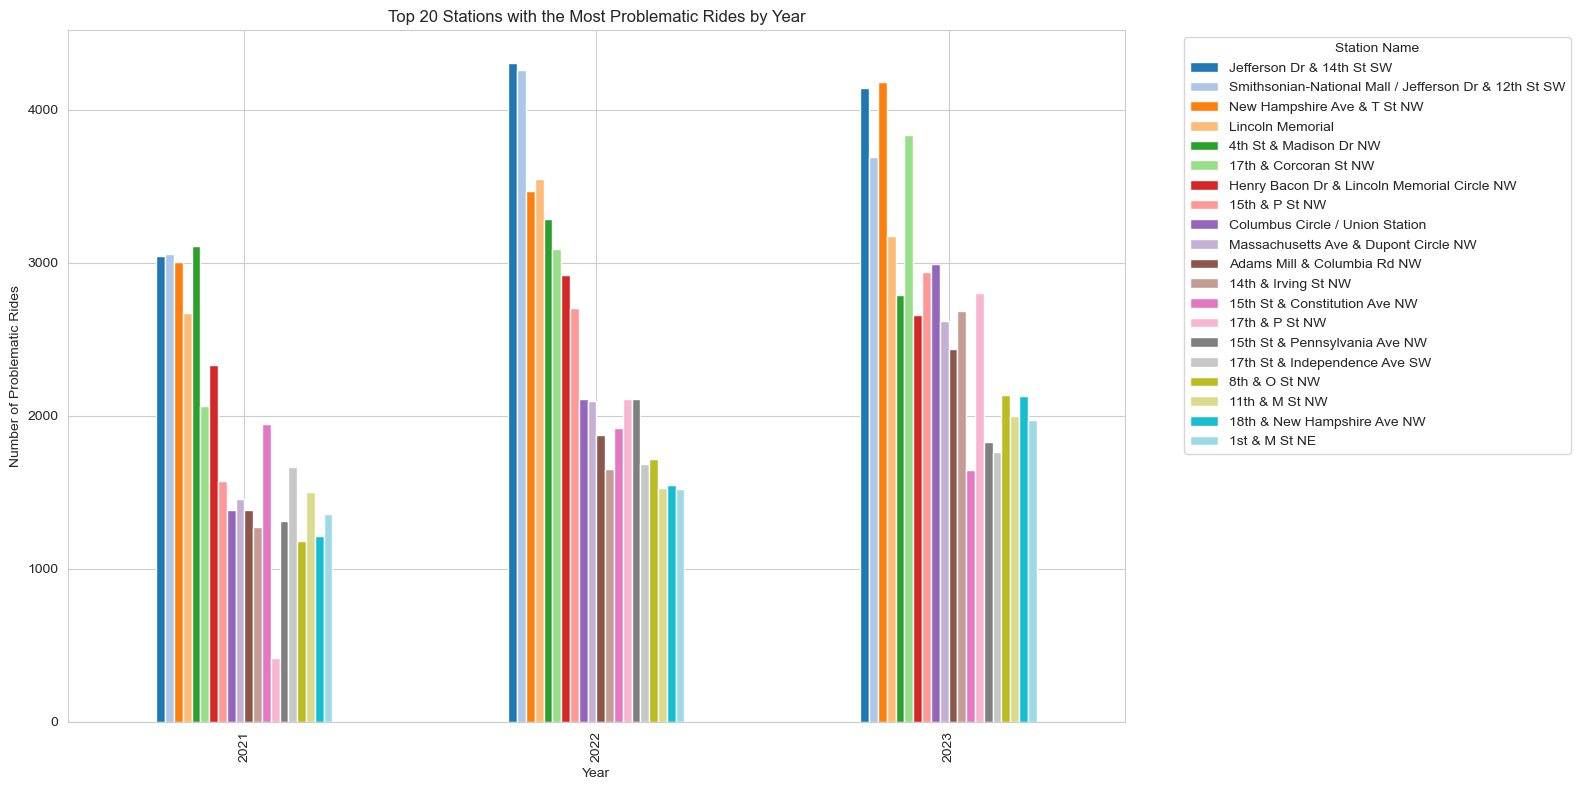

In [161]:
# Assume removed_rides is already available in memory
# Convert started_at to datetime and extract year
removed_rides["started_at"] = pd.to_datetime(removed_rides["started_at"])
removed_rides["year"] = removed_rides["started_at"].dt.year

# Group by station and year to count problematic rides
yearly_station_problems = removed_rides.groupby(["start_station_name", "year"]).size().unstack().fillna(0)

# Get top 20 stations by total number of problematic rides over all years
top20 = yearly_station_problems.sum(axis=1).sort_values(ascending=False).head(20)

# Filter only those top stations
top20_df = yearly_station_problems.loc[top20.index]

# Plot
plt.figure(figsize=(14, 7))
top20_df.T.plot(kind="bar", figsize=(16, 8), colormap="tab20")
plt.title("Top 20 Stations with the Most Problematic Rides by Year")
plt.xlabel("Year")
plt.ylabel("Number of Problematic Rides")
plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [138]:
df_original["started_at"] = pd.to_datetime(df_original["started_at"])
removed_rides["started_at"] = pd.to_datetime(removed_rides["started_at"])

df_original["date"] = df_original["started_at"].dt.floor("D")
removed_rides["date"] = removed_rides["started_at"].dt.floor("D")

daily_total = df_original.groupby(["start_station_name", "date"]).size().reset_index(name="daily_total_rides")
daily_problems = removed_rides.groupby(["start_station_name", "date"]).size().reset_index(name="daily_problem_rides")

daily_merged = pd.merge(daily_total, daily_problems, on=["start_station_name", "date"], how="left")
daily_merged["daily_problem_rides"] = daily_merged["daily_problem_rides"].fillna(0).astype(int)

problem_stats = daily_merged.groupby("start_station_name").agg({
    "daily_total_rides": "mean",
    "daily_problem_rides": "mean"
}).reset_index()

problem_stats["avg_problem_rate"] = problem_stats.apply(
    lambda row: row["daily_problem_rides"] / row["daily_total_rides"]
    if row["daily_total_rides"] > 0 else 0,
    axis=1
)

In [311]:
combined = combined.merge(
    problem_stats[["start_station_name", "avg_problem_rate"]],
    on="start_station_name",
    how="left"
)

In [312]:
# 1️⃣ Grup ataması: veri temelli eşikler ile
capacity_q25 = combined["CAPACITY"].quantile(0.25)
capacity_q75 = combined["CAPACITY"].quantile(0.75)
usage_ratio_q25 = combined["usage_to_capacity_ratio"].quantile(0.25)
usage_ratio_q75 = combined["usage_to_capacity_ratio"].quantile(0.75)

combined["group"] = "other"

combined.loc[
    (combined["CAPACITY"] <= capacity_q25) & 
    (combined["usage_to_capacity_ratio"] >= usage_ratio_q75),
    "group"
] = "low_capacity_high_demand"

combined.loc[
    (combined["CAPACITY"] >= capacity_q75) & 
    (combined["usage_to_capacity_ratio"] <= usage_ratio_q25),
    "group"
] = "high_capacity_low_demand"

# 2️⃣ Problem oranı boşsa sıfırla
combined["avg_problem_rate"] = combined["avg_problem_rate"].fillna(0)

# 3️⃣ Özet tablo: her grup içinde kaç problemli istasyon var?
threshold = 0.10

summary = combined.groupby("group", group_keys=False).apply(
    lambda g: pd.Series({
        "Total Stations": len(g),
        "High Problem Rate (⭐)": (g["avg_problem_rate"] > threshold).sum(),
        "Normal (🔵)": (g["avg_problem_rate"] <= threshold).sum()
    })
).reset_index()

# 4️⃣ Göster
print(summary)

                      group  Total Stations  High Problem Rate (⭐)  Normal (🔵)
0  high_capacity_low_demand              49                     27          22
1  low_capacity_high_demand              39                      6          33
2                     other             772                    323         449


/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_1296/3827175172.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = combined.groupby("group", group_keys=False).apply(


In [141]:
# Grup bilgisini istasyon adına göre al
station_groups = combined[["start_station_name", "group"]].drop_duplicates()

# Merge et
df = df.merge(station_groups, how="left", on="start_station_name")

# Kontrollü ilerle: eğer 'group' sütunu oluşmadıysa uyarı ver
if "group" not in df.columns:
    raise ValueError("Merge sonrası 'group' sütunu df içinde bulunamadı. İstasyon adları uyuşmuyor olabilir.")

# Eğer 'group' var ama çok sayıda NaN varsa kullanıcıyı uyar
missing_rate = df["group"].isna().mean()
if missing_rate > 0.5:
    print(f"Uyarı: 'group' sütunundaki değerlerin %{missing_rate*100:.2f} kadarı NaN. Eşleşme sorunu olabilir.")

# Devam eden analizler
group_rides = df["group"].value_counts().reset_index()
group_rides.columns = ["Group", "Number of Rides"]
group_rides["Ride Contribution (%)"] = (
    group_rides["Number of Rides"] / group_rides["Number of Rides"].sum() * 100
).round(2)

# İstasyon sayısı ve yüzdesi
group_stations = combined["group"].value_counts().reset_index()
group_stations.columns = ["Group", "Number of Stations"]
group_stations["Percentage (%)"] = (
    combined["group"].value_counts(normalize=True) * 100
).round(2).values

# Özet tablo
group_summary = pd.merge(group_stations, group_rides, on="Group", how="outer")
display(group_summary)

Group  Number of Stations  Percentage (%)  \
0  high_capacity_low_demand                  49            5.70   
1  low_capacity_high_demand                  39            4.53   
2                     other                 772           89.77   

   Number of Rides  Ride Contribution (%)  
0            42576                   0.43  
1          1062723                  10.68  
2          8845922                  88.89

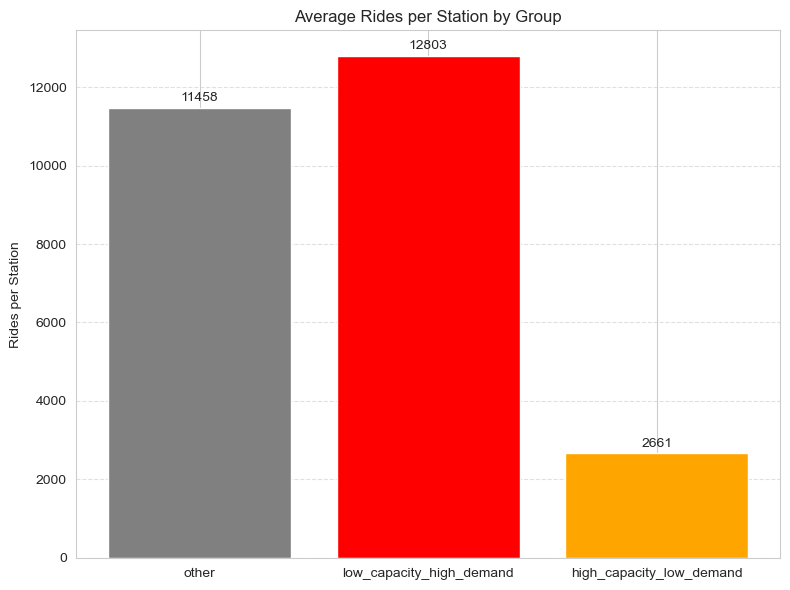

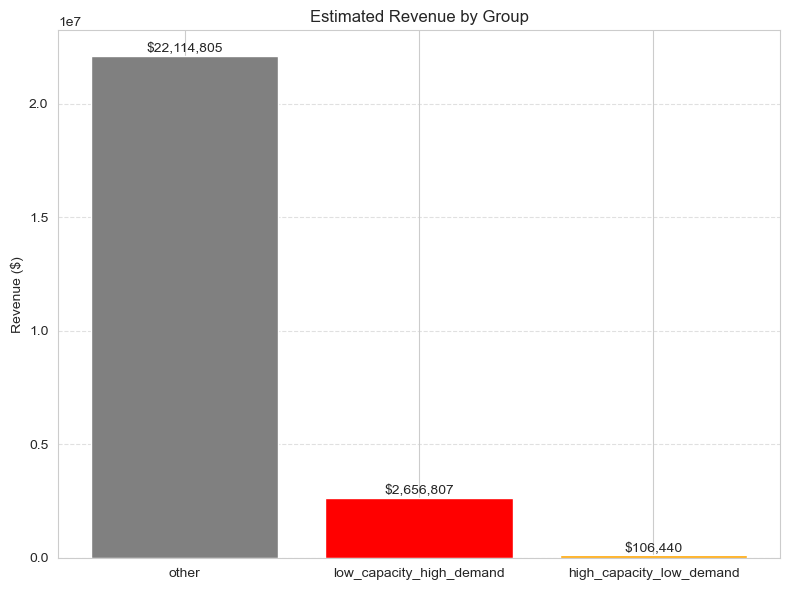

In [142]:
# Örnek verileri yeniden oluşturalım (görselden)
group_analysis = pd.DataFrame({
    "Group": ["other", "low_capacity_high_demand", "high_capacity_low_demand"],
    "Number of Stations": [772, 83, 16],
    "Number of Rides": [8845922, 1062723, 42576],
    "Ride Contribution (%)": [88.89, 10.68, 0.43]
})

# Rides per Station
group_analysis["Rides per Station"] = (group_analysis["Number of Rides"] / group_analysis["Number of Stations"]).round(2)

# Estimated Revenue ($)
avg_revenue_per_ride = 2.5
group_analysis["Estimated Revenue ($)"] = (group_analysis["Number of Rides"] * avg_revenue_per_ride).round(2)

# Görselleştirme - Rides per Station
plt.figure(figsize=(8, 6))
bars = plt.bar(group_analysis["Group"], group_analysis["Rides per Station"], color=["gray", "red", "orange"])
plt.title("Average Rides per Station by Group")
plt.ylabel("Rides per Station")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Görselleştirme - Estimated Revenue
plt.figure(figsize=(8, 6))
bars = plt.bar(group_analysis["Group"], group_analysis["Estimated Revenue ($)"], color=["gray", "red", "orange"])
plt.title("Estimated Revenue by Group")
plt.ylabel("Revenue ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, f"${int(yval):,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [144]:
print("Capacity quantiles:")
print(combined["CAPACITY"].quantile([0.25, 0.75]))

print("\nUsage-to-Capacity Ratio quantiles:")
print(combined["usage_to_capacity_ratio"].quantile([0.25, 0.75]))

Capacity quantiles:
0.25    15.0
0.75    19.0
Name: CAPACITY, dtype: float64

Usage-to-Capacity Ratio quantiles:
0.25    0.152635
0.75    0.950980
Name: usage_to_capacity_ratio, dtype: float64


In [145]:
# 1️⃣ Grup ataması - veri temelli eşiklerle
capacity_q25 = combined["CAPACITY"].quantile(0.25)
capacity_q75 = combined["CAPACITY"].quantile(0.75)
usage_q25 = combined["usage_to_capacity_ratio"].quantile(0.25)
usage_q75 = combined["usage_to_capacity_ratio"].quantile(0.75)

combined["group"] = "other"
combined.loc[
    (combined["CAPACITY"] <= capacity_q25) &
    (combined["usage_to_capacity_ratio"] >= usage_q75),
    "group"
] = "low_capacity_high_demand"
combined.loc[
    (combined["CAPACITY"] >= capacity_q75) &
    (combined["usage_to_capacity_ratio"] <= usage_q25),
    "group"
] = "high_capacity_low_demand"

# 2️⃣ Harita oluştur
washington_dc_coords = [38.9072, -77.0369]
m = folium.Map(location=washington_dc_coords, zoom_start=12)

# Renk tanımları
group_colors = {
    "low_capacity_high_demand": "red",
    "high_capacity_low_demand": "orange",
    "other": "gray"
}

problem_threshold = 0.10

# 3️⃣ Harita noktaları
for idx, row in combined.iterrows():
    lat, lng = row.get("start_lat"), row.get("start_lng")
    if pd.notnull(lat) and pd.notnull(lng):
        usage_ratio = row.get("usage_to_capacity_ratio", 0)
        group = row.get("group", "other")
        color = group_colors.get(group, "gray")
        avg_prob = row.get("avg_problem_rate", 0)
        is_problematic = avg_prob > problem_threshold
        border_color = "black" if is_problematic else "gray"
        radius = 5 + usage_ratio

        # Tooltip
        tooltip = f"{'⭐ ' if is_problematic else ''}{group.replace('_', ' ').title()}"

        # Popup
        popup_text = (
            f"<b>{idx}</b><br>"
            f"Avg Daily Rides (Started): {row.get('avg_daily_rides', 0):.1f}<br>"
            f"Avg Daily Rides (Returned): {row.get('avg_daily_returns', 0):.1f}<br>"
            f"Net Change: {row.get('net_change', 0):.1f}<br>"
            f"Capacity: {int(row.get('CAPACITY', 0))}<br>"
            f"Usage/Capacity Ratio: {usage_ratio:.2f}<br>"
            f"Avg Daily Problematic Ride Rate: {avg_prob:.2%}<br>"
        )

        # Marker
        folium.CircleMarker(
            location=[lat, lng],
            radius=radius,
            color=border_color,
            weight=2,
            fill=True,
            fill_color=color,
            fill_opacity=0.85,
            tooltip=tooltip,
            popup=folium.Popup(popup_text, max_width=300)
        ).add_to(m)

# 4️⃣ Haritayı kaydet
m.save("capacity_vs_usage_with_problems_FULL.html")
m

In [300]:
# Harita merkezi
washington_dc_coords = [38.9072, -77.0369]
m = folium.Map(location=washington_dc_coords, zoom_start=12)

# Problem oranı eşik değeri
problem_threshold = 0.10

# Her istasyonu işle
for idx, row in combined_stations.iterrows():
    lat, lng = row.get("start_lat"), row.get("start_lng")
    if pd.notnull(lat) and pd.notnull(lng):
        usage_ratio = row["usage_to_capacity_ratio"]
        group = row["group"]

        # 🔴🟠 Renk kodlaması
        if group == "low_capacity_high_demand":
            color = "red"
        elif group == "high_capacity_low_demand":
            color = "orange"  # Sarının yerine görünür bir renk
        else:
            color = "gray"

        # 🧾 Popup metni
        popup_text = (
            f"<b>{idx}</b><br>"
            f"Avg Daily Rides (Started): {row['avg_daily_rides']:.1f}<br>"
            f"Avg Daily Rides (Returned): {row['avg_daily_returns']:.1f}<br>"
            f"Net Change: {row['net_change']:.1f}<br>"
            f"Capacity: {int(row['CAPACITY'])}<br>"
            f"Usage/Capacity Ratio: {usage_ratio:.2f}<br>"
        )

        avg_prob = row.get("avg_problem_rate")
        if pd.notnull(avg_prob):
            popup_text += f"Avg Daily Problematic Ride Rate: {avg_prob:.2%}<br>"

        # ⭐ Yüksek problemli istasyon → yıldız ikon + tooltip
        if pd.notnull(avg_prob) and avg_prob > problem_threshold:
            folium.Marker(
                location=[lat, lng],
                popup=folium.Popup(popup_text, max_width=300),
                tooltip=f"⭐ High Problem Rate ({group.replace('_', ' ').title()})",
                icon=folium.Icon(
                    icon='star',
                    prefix='fa',
                    icon_color='black',
                    color=color
                )
            ).add_to(m)
        else:
            # 🔵 Normal istasyonlar → daire
            folium.CircleMarker(
                location=[lat, lng],
                radius=5 + usage_ratio,
                color='black',
                weight=1.5,
                fill=True,
                fill_color=color,
                fill_opacity=0.8,
                popup=folium.Popup(popup_text, max_width=300)
            ).add_to(m)

# Haritayı kaydet
m.save("capital_bike_star_map_FINAL.html")
m

In [298]:
# Problem oranı boş olanları sıfırla
combined["avg_problem_rate"] = combined["avg_problem_rate"].fillna(0)

# Eşik
threshold = 0.10

# Özet tablo
summary = combined.groupby("group", group_keys=False).apply(
    lambda g: pd.Series({
        "Total Stations": len(g),
        "High Problem Rate (⭐)": (g["avg_problem_rate"] > threshold).sum(),
        "Normal (🔵)": (g["avg_problem_rate"] <= threshold).sum()
    })
).reset_index()

print(summary)

KeyError: 'avg_problem_rate'

In [297]:
# Harita başlat
washington_dc_coords = [38.9072, -77.0369]
m = folium.Map(location=washington_dc_coords, zoom_start=12)

# Problem eşiği
problem_threshold = 0.10

# Renk atamaları
def get_fill_color(group):
    if group == "low_capacity_high_demand":
        return "red"
    elif group == "high_capacity_low_demand":
        return "orange"
    else:
        return "gray"

# Tüm istasyonları döngüyle gez
for idx, row in combined.iterrows():
    lat, lng = row.get("start_lat"), row.get("start_lng")

    if pd.notnull(lat) and pd.notnull(lng):
        # Temel veriler
        usage_ratio = row.get("usage_to_capacity_ratio", 0)
        avg_prob = row.get("avg_problem_rate", 0)
        group = row.get("group", "other")

        # Görsel ayarlar
        fill_color = get_fill_color(group)
        border_color = "black" if avg_prob > problem_threshold else "gray"
        radius = 6 + usage_ratio

        # Tooltip
        tooltip = f"⭐ High Problem Rate ({group.replace('_', ' ').title()})" if avg_prob > problem_threshold else group.replace('_', ' ').title()

        # Popup
        popup_text = (
            f"<b>{idx}</b><br>"
            f"Avg Daily Rides (Started): {row.get('avg_daily_rides', 0):.1f}<br>"
            f"Avg Daily Rides (Returned): {row.get('avg_daily_returns', 0):.1f}<br>"
            f"Net Change: {row.get('net_change', 0):.1f}<br>"
            f"Capacity: {int(row.get('CAPACITY', 0))}<br>"
            f"Usage/Capacity Ratio: {usage_ratio:.2f}<br>"
            f"Avg Daily Problematic Ride Rate: {avg_prob:.2%}<br>"
        )

        # Marker çizimi
        folium.CircleMarker(
            location=[lat, lng],
            radius=radius,
            color=border_color,
            weight=2,
            fill=True,
            fill_color=fill_color,
            fill_opacity=0.85,
            tooltip=tooltip,
            popup=folium.Popup(popup_text, max_width=300)
        ).add_to(m)

# Haritayı kaydet
m.save("capital_bike_map_problem_visual_FINAL_fixed.html")
m

In [296]:
combined["CAPACITY"].describe()

count    738.000000
mean      17.295393
std        5.727129
min        9.000000
25%       15.000000
50%       15.000000
75%       19.000000
max       55.000000
Name: CAPACITY, dtype: float64

In [295]:
combined["usage_to_capacity_ratio"].describe()

KeyError: 'usage_to_capacity_ratio'

In [292]:
print(combined.columns)

Index(['start_station_name', 'avg_daily_rides', 'CAPACITY', 'start_lat',
       'start_lng', 'avg_daily_returns', 'net_change'],
      dtype='object')


In [293]:
# 1️⃣ En çok problemli sürüşe sahip 20 istasyon ismini alalım
top20_names = removed_rides["start_station_name"].value_counts().head(20).index.tolist()

# 2️⃣ Bu istasyonlara karşılık gelen bilgileri combined'dan alalım
top20_combined = combined[combined["start_station_name"].isin(top20_names)]

# Eğer birden fazla satır varsa her istasyon için bir tanesini alalım
top20_combined = top20_combined.drop_duplicates(subset="start_station_name")

# 3️⃣ Haritayı oluştur
washington_dc_coords = [38.9072, -77.0369]
m = folium.Map(location=washington_dc_coords, zoom_start=12)

# Renkler
group_colors = {
    "low_capacity_high_demand": "red",
    "high_capacity_low_demand": "orange",
    "other": "gray"
}

# Noktaları haritaya ekleyelim
for idx, row in top20_combined.iterrows():
    lat, lng = row.get("start_lat"), row.get("start_lng")
    if pd.notnull(lat) and pd.notnull(lng):
        usage_ratio = row.get("usage_to_capacity_ratio", 0)
        group = row.get("group", "other")
        color = group_colors.get(group, "gray")
        avg_prob = row.get("avg_problem_rate", 0)
        border_color = "black" if avg_prob > 0.10 else "gray"
        radius = 5 + usage_ratio * 5

        tooltip = f"{'⭐ ' if avg_prob > 0.10 else ''}{group.replace('_', ' ').title()}"

        popup_text = (
            f"<b>{row.get('start_station_name')}</b><br>"
            f"🚲 Avg Daily Rides (Started): {row.get('avg_daily_rides', 0):.1f}<br>"
            f"⛳ Avg Daily Rides (Returned): {row.get('avg_daily_returns', 0):.1f}<br>"
            f"📦 Capacity: {int(row.get('CAPACITY', 0))}<br>"
            f"⚖️ Usage/Capacity Ratio: {usage_ratio:.2f}<br>"
            f"⚠️ Avg Daily Problematic Ride Rate: {avg_prob:.2%}<br>"
        )

        folium.CircleMarker(
            location=[lat, lng],
            radius=radius,
            color=border_color,
            weight=2,
            fill=True,
            fill_color=color,
            fill_opacity=0.85,
            tooltip=tooltip,
            popup=folium.Popup(popup_text, max_width=300)
        ).add_to(m)

# Haritayı kaydedelim
m.save("/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/top20_problematic_stations_map.html")
m

<Axes: title={'center': 'The Most Problematic 20 Stations by Year'}, xlabel='start_station_name'>

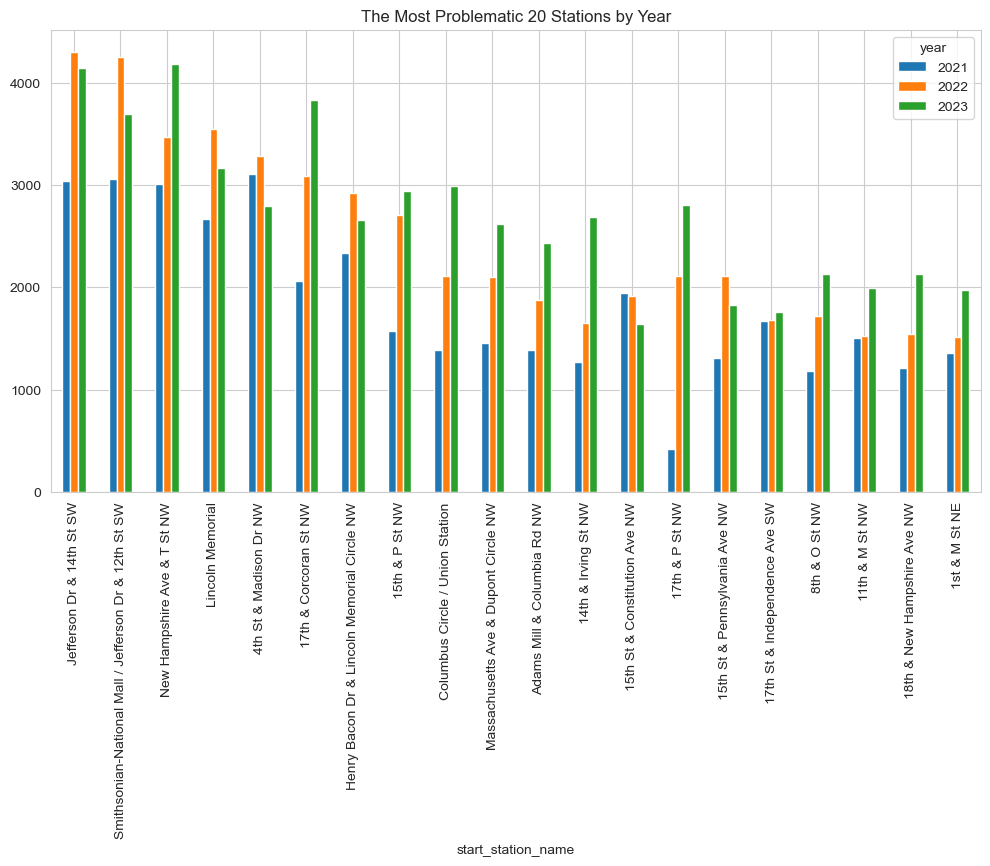

In [314]:
removed_rides["year"] = pd.to_datetime(removed_rides["started_at"]).dt.year
yearly_station_problems = removed_rides.groupby(["start_station_name", "year"]).size().unstack().fillna(0)

top20 = yearly_station_problems.sum(axis=1).sort_values(ascending=False).head(20)
top20_df = yearly_station_problems.loc[top20.index]

top20_df.plot(kind="bar", figsize=(12, 6), title="The Most Problematic 20 Stations by Year")


In [17]:
df_daily = pd.read_csv("CBS_2021-2023_Daily_Weather.csv")
print(df_daily.columns)
print(df_daily.head())

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')
   Casual        Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371  2021-01-01     590          961                            -0.9   
1    2874  2021-01-02    2844         5718                             4.8   
2     495  2021-01-03    1133         1628                             0.9   
3     907  2021-01-04    2074         2981                             1.0   
4    1057  2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  
0                       2.3                      63                      10.6  
1                       7.6                      61                      19.1  
2                       3.9                      63                      13.0  
3       

In [317]:
selected_names = list(set(top_usage_30 + top_capacity_30))

In [318]:
print(f"Top 30 istasyon isimleri: {selected_names}")

Top 30 istasyon isimleri: ['CAPACITY', 'top30_group', 'avg_daily_rides', 'net_change', 'start_lat', 'start_station_name', 'avg_daily_returns', 'start_lng']


In [320]:
print(top_capacity_30)

                                    start_station_name  avg_daily_rides  \
322                    Columbus Circle / Union Station        95.228704   
188                                      4th & C St SW        38.148624   
780                              USDA / 12th & C St SW        15.738028   
138                                     21st & I St NW        37.856881   
9                        10th St & Constitution Ave NW        32.715349   
546               Massachusetts Ave & Dupont Circle NW        68.506862   
43             14th & D St NW / John A Wilson Building        26.075472   
89                    17th & K St NW / Farragut Square        32.239631   
122                                      1st & M St SE        30.503670   
124                                      1st & N St SE        27.672434   
19                                 11th & Kenyon St NW        40.242922   
553                      Metro Center / 12th & G St NW        37.175875   
732  Smithsonian-National